<a href="https://colab.research.google.com/github/lebedevAU/N1/blob/main/%D0%94%D0%972_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Автокорреляция

In [1]:
import matplotlib.pyplot as plt # Подключаем matplotlib
import seaborn as sns
sns.set_style('darkgrid')

import pandas as pd #Пандас
import matplotlib.pyplot as plt #Отрисовка графиков
from tensorflow.keras.utils import to_categorical 
import numpy as np #Numpy
from tensorflow.keras.optimizers import Adam #Оптимизатор
from tensorflow.keras.models import Sequential, Model #Два варианты моделей
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D, MaxPooling1D, RepeatVector #Стандартные слои
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Нормировщики
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # для генерации выборки временных рядов

import warnings
warnings.filterwarnings("ignore")
# Рисовать графики сразу же
%matplotlib inline

1. Обучите простую полносвязную сеть для прогнозирования временного ряда. Используйте только столбец close и визуализируйте результат.

2. Обучите такую же архитектуру сети на прогнозирование на 10 шагов вперёд прямым способом и визуализируйте результат.

3. Постройте графики сравнения предсказания с оригинальным сигналом по всем 10 шагам предсказания (10 графиков на разных отдельных осях).

4. Сделайте те же задания с другой сетью, которая будет использовать Conv1D или LSTM слой

In [ ]:
import matplotlib.pyplot as plt # Подключаем matplotlib
import seaborn as sns
sns.set_style('darkgrid')

import pandas as pd #Пандас
import matplotlib.pyplot as plt #Отрисовка графиков
from tensorflow.keras.utils import to_categorical 
import numpy as np #Numpy
from tensorflow.keras.optimizers import Adam #Оптимизатор
from tensorflow.keras.models import Sequential, Model #Два варианты моделей
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D, MaxPooling1D, RepeatVector #Стандартные слои
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Нормировщики
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # для генерации выборки временных рядов

import warnings
warnings.filterwarnings("ignore")
# Рисовать графики сразу же
%matplotlib inline

////////////// ДЗ

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_data = pd.read_csv('/content/drive/My Drive/Data/18_19.csv', sep=';')
base_data16 = pd.read_csv('/content/drive/My Drive/Data/16_17.csv', sep=';')
base_data18 = pd.read_csv('/content/drive/My Drive/Data/18_19.csv', sep=';')
data16_17 = base_data16.iloc[:,2:]
data18_19 = base_data18.iloc[:,2:]

In [4]:
print(data16_17.head)
base_data.tail()


<bound method NDFrame.head of           OPEN     MAX     MIN   CLOSE  VOLUME
0       2351.0  2355.8  2350.0  2350.0    2547
1       2352.9  2355.7  2350.0  2355.7     195
2       2355.6  2356.0  2351.4  2354.1     257
3       2354.5  2355.0  2351.2  2353.7     763
4       2353.1  2353.9  2353.1  2353.6     231
...        ...     ...     ...     ...     ...
263920  3320.5  3322.0  3316.5  3317.0    1227
263921  3318.0  3323.5  3317.0  3323.5     938
263922  3323.0  3324.0  3314.5  3314.5    1996
263923  3334.5  3334.5  3334.5  3334.5   83877
263924  3334.5  3334.5  3334.5  3334.5       2

[263925 rows x 5 columns]>


,DATE,TIME,OPEN,MAX,MIN,CLOSE,VOLUME
217942,23.08.2019,18:45:00,5183.5,5183.5,5183.5,5183.5,31523
217943,23.08.2019,18:46:00,5183.5,5183.5,5183.5,5183.5,5090
217944,23.08.2019,18:47:00,5183.5,5183.5,5183.5,5183.5,230
217945,23.08.2019,18:48:00,5183.5,5183.5,5183.5,5183.5,5
217946,23.08.2019,18:49:00,5183.5,5183.5,5183.5,5183.5,994


In [5]:
# Объединяем базы из двух файлов
data = data16_17.copy()                 # Создаем копию первой базы
data = pd.concat([data16_17,data18_19]) # Присоединяем к ней вторую базу
data = np.array(data)                   # Превращаем в numpy массив
#data = data[:,2:1]



In [6]:
data.shape

(481872, 5)

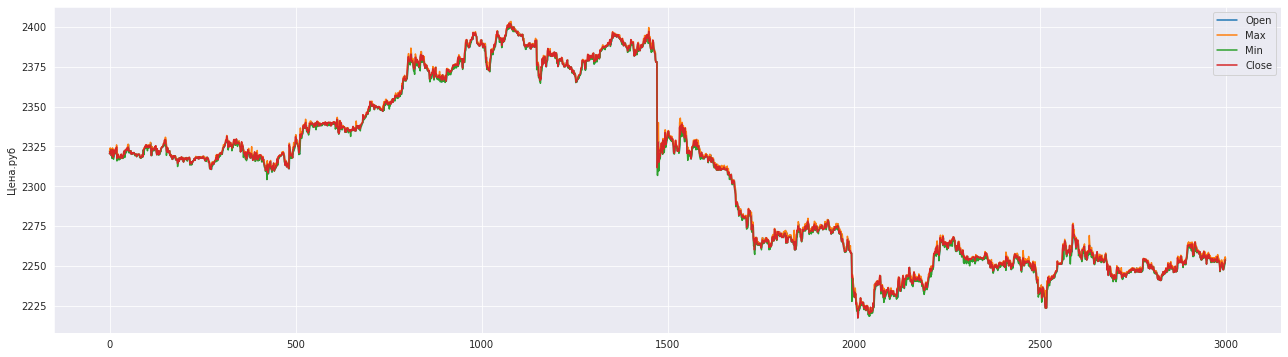

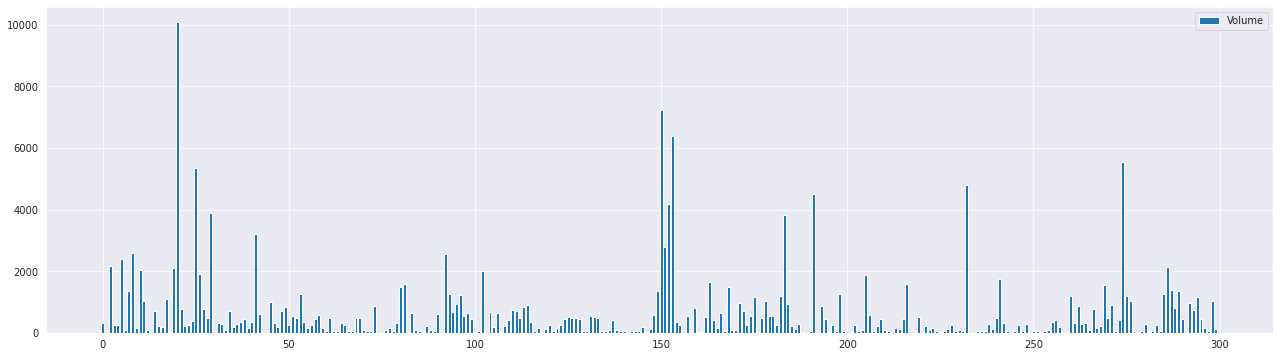

In [7]:
#Отображаем исходные от точки start и длинной stop
start = 100            #С какой точки начинаем
#stop = data.shape[0] #Сколько точек отрисуем
length = 300 #Сколько точек отрисуем

#Заполняем текстовые названия каналов данных
chanelNames = ['Open', 'Max', 'Min', 'Close', 'Volume']

#Рисуем все графики данных
#ЧЕтыре основных канала - open, max, min, close
plt.figure(figsize=(22,6))
for i in range(4):
  #Отрисовываем часть данных
  #От начальной точки, до начальной точки + размер шага отрисовки
  plt.plot(data[100:3100,i], label=chanelNames[i])
plt.ylabel('Цена.руб')
plt.legend()
plt.show()

#Канал volume
plt.figure(figsize=(22,6))
plt.bar(x=np.arange(length), height=data[start:start+length,4], label="Volume")
plt.legend()
plt.show()

In [8]:
#data = np.array(data)
#data = data.drop(columns=['DATE', 'TIME'])# пробуем удалить
data.shape



(481872, 5)

In [9]:
#скалим
xLen = 300
valLen = 20000 #проверочная
baseLen = data.shape[0] - valLen # из всей базы вычитаю проверочную, вот и получается тренировочная

xTrain, xTest = data[:baseLen], data[baseLen+xLen+2:]

#data.shape
#print(dataTest.shape)

xScaler = MinMaxScaler()
xScaler.fit(xTrain)
xTrain = xScaler.transform(xTrain)
xTest = xScaler.transform(xTest)

yTrain, yTest = np.reshape(data[:baseLen,3],(-1,1)), np.reshape(data[baseLen+xLen+2:,3],(-1,1)) 
yScaler = MinMaxScaler()
yScaler.fit(yTrain)
yTrain = yScaler.transform(yTrain)
yTest = yScaler.transform(yTest)

In [10]:
#print(data.shape[0] / OneDay)
#print(xTrain.shape[0]+xTest.shape[0]+OneDay*4)
print(data.shape)
print (data[3000:3003, 3])
print ("xtest",xTest.shape)
print ("ytest",yTest.shape)
data[:baseLen, 3].shape


(481872, 5)
[2263.1 2262.7 2262.6]
xtest (19698, 5)
ytest (19698, 1)


(461872,)

In [11]:
testDataGen = TimeseriesGenerator(
    xTest, 
    yTest, 
    length=xLen,
    stride=1, 
    batch_size=40
    ) 
trainDataGen = TimeseriesGenerator(
    xTrain, 
    yTrain, 
    length=xLen, 
    stride=1,
    batch_size=40
    )

In [12]:
def getPred(currModel, xVal, yVal, yScaler):
  predVal = yScaler.inverse_transform(currModel.predict(xVal))
  yValUnscaled = yScaler.inverse_transform(yVal)
  return (predVal, yValUnscaled)

In [13]:
def showPredict(start, step, channel, predVal, yValUnscaled):
  plt.figure(figsize=(20,7))
  plt.plot(predVal[start:start+step,0], label='Прогноз')
  plt.plot(yValUnscaled[start:start+step, channel], label='Базовый ряд')
  plt.xlabel('Time')
  plt.ylabel('Значение Close')
  plt.legend()
  plt.show()

In [14]:
def corellate(a, b):
  ma = a.mean()
  mb = b.mean()
  mab = (a*b).mean()
  sa = a.std()
  sb = b.std()

  val = 1
  if ((sa>0)&(sb>0)):# чтобы не делить на ноль
    val = (mab-ma*mb)/(sa*sb)
  return val

In [15]:
def showCorr(channels, corrSteps, predVal, yValUnscaled):
  for ch in channels:
    corr = [] #  пустой лист
    yLen = yValUnscaled.shape[0] 
    for i in range(corrSteps):
      corr.append(corellate(yValUnscaled[:yLen-i,ch], predVal[i:,0]))
    own_corr = [] 
    for i in range(corrSteps):
      own_corr.append(corellate(yValUnscaled[:yLen-i,ch], yValUnscaled[i:, ch]))
    plt.figure(figsize=(14,7))
    plt.plot(corr, label='Предсказание на ' + str(ch+1) + ' шаг')
    plt.plot(own_corr, label='Эталон')
  plt.xlabel('Время')
  plt.ylabel('Значение')
  plt.legend()
  plt.show()

In [16]:
DataGen = TimeseriesGenerator(xTest, yTest, length=300, batch_size=len(xTest))
xVal = []
yVal = []
for i in DataGen:
  xVal.append(i[0])
  yVal.append(i[1])
xVal = np.array(xVal)
yVal = np.array(yVal)

In [17]:
#Создаём нейронку
modelD = Sequential()
#modelD.add(Conv1D(150, 5, input_shape = (1,5), activation="relu",  padding = 'same'))
modelD.add(Dense(150,input_shape = (xLen,5), activation="relu" )) # 5 - количество каналов
modelD.add(Flatten())
modelD.add(Dense(10, activation="linear"))

#Компилируем
modelD.compile(loss="mse", optimizer=Adam(lr=1e-4))

modelD.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300, 150)          900       
                                                                 
 flatten (Flatten)           (None, 45000)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                450010    
                                                                 
Total params: 450,910
Trainable params: 450,910
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = modelD.fit(trainDataGen, epochs=30, verbose=1, validation_data=testDataGen)

Epoch 1/30
11540/11540 [==============================] - 76s 6ms/step - loss: 0.0012 - val_loss: 1.1461e-04
Epoch 2/30
11540/11540 [==============================] - 73s 6ms/step - loss: 1.8831e-04 - val_loss: 6.2948e-05
Epoch 3/30
11540/11540 [==============================] - 72s 6ms/step - loss: 9.9814e-05 - val_loss: 3.1159e-05
Epoch 4/30
11540/11540 [==============================] - 73s 6ms/step - loss: 5.1616e-05 - val_loss: 2.1251e-05
Epoch 5/30
11540/11540 [==============================] - 73s 6ms/step - loss: 4.3947e-05 - val_loss: 1.8803e-05
Epoch 6/30
11540/11540 [==============================] - 72s 6ms/step - loss: 3.4026e-05 - val_loss: 3.7513e-05
Epoch 7/30
11540/11540 [==============================] - 72s 6ms/step - loss: 2.9140e-05 - val_loss: 7.4265e-05
Epoch 8/30
11540/11540 [==============================] - 72s 6ms/step - loss: 2.6081e-05 - val_loss: 2.3384e-05
Epoch 9/30
11540/11540 [==============================] - 73s 6ms/step - loss: 2.9753e-05 - val_loss

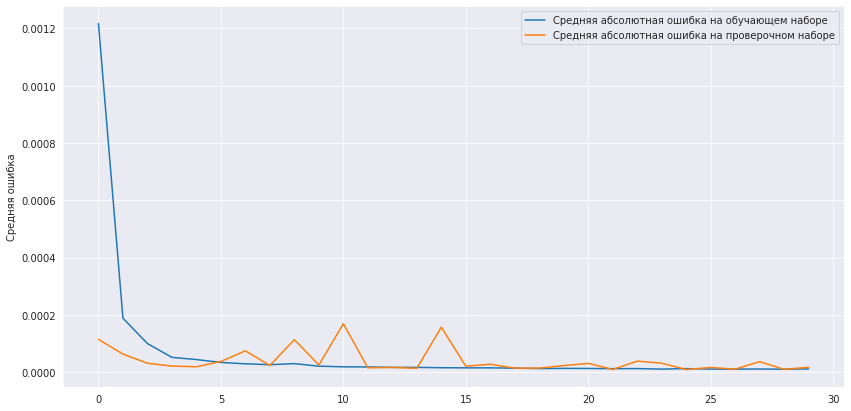

In [19]:
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

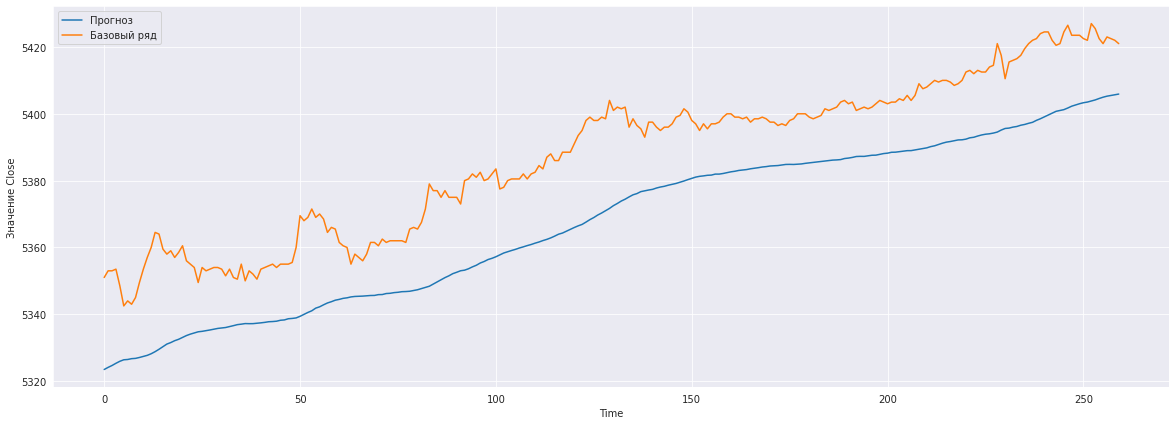

In [21]:
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

showPredict(0, 260, 0, predVal, yValUnscaled)

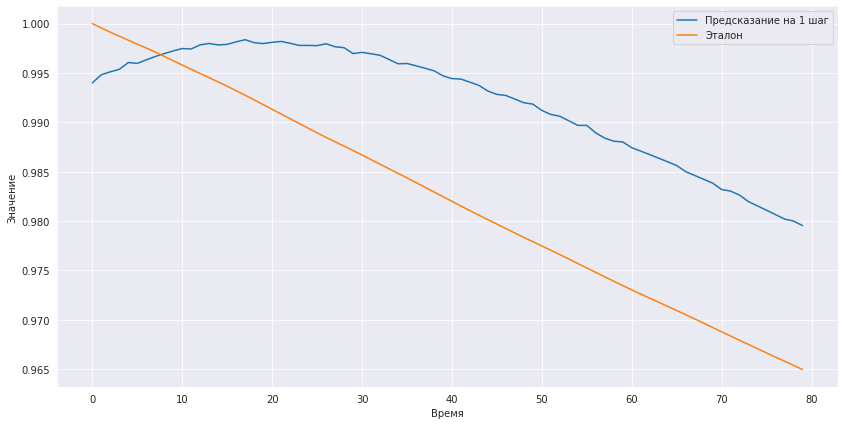

In [22]:
showCorr([0], 80, predVal, yValUnscaled)

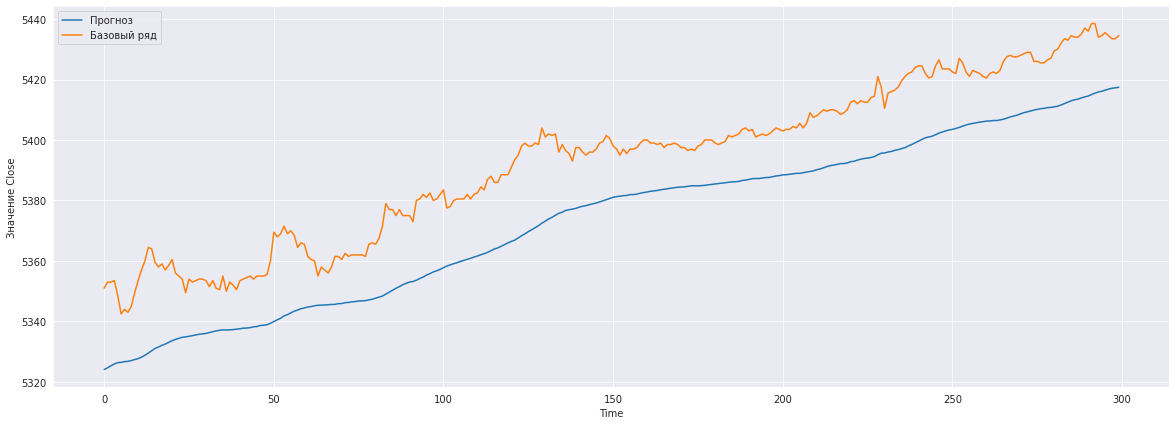

In [23]:
currModel = modelD # текущaя модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) 

showPredict(0, 300, 0, predVal[1:], yValUnscaled[:-1])

предсказание

In [24]:
xLen = 300
valLen = 20000 #проверочная
trainLen = data.shape[0] - valLen # из всей базы вычитаю проверочную, вот и получается тренировочная

xTrain, xTest = data[:trainLen-10], data[trainLen+xLen +2:-10]

In [25]:
xScaler = MinMaxScaler()
xScaler.fit(xTrain)
xTrain = xScaler.transform(xTrain)
xTest = xScaler.transform(xTest)
yTrain, yTest = (np.array([data[:trainLen, 3][i:i+10] for i in range(len(data[:trainLen, 3])-10)]), 
                 np.array([data[trainLen+xLen + 2:, 3][i:i+10] for i in range(len(data[trainLen+xLen + 2:, 3])-10)]))
#yTrain, yTest = np.array([data[:trainLen, 3][i:i+10] for i in range(len(data[:trainLen, 3])-10)]), np.array(data[trainLen+xLen + 2:, 3])
yScaler = MinMaxScaler()
yScaler.fit(yTrain)
#yTrain = yScaler.transform(yTrain)
#yTest = yScaler.transform(yTest)

MinMaxScaler()

In [26]:
DataGen = TimeseriesGenerator(xTest, yTest, length=300, batch_size=len(xTest))
xVal = []
yVal = []
for i in DataGen:
  xVal.append(i[0])
  yVal.append(i[1])
xVal = np.array(xVal)
yVal = np.array(yVal)

In [27]:
print(xVal.shape)
print(yVal.shape)

(1, 19388, 300, 5)
(1, 19388, 10)


In [28]:
testDataGen10 = TimeseriesGenerator(xTest, yTest, length=xLen, batch_size=40) 
trainDataGen10 = TimeseriesGenerator(xTrain, yTrain, length=xLen, batch_size=40)

In [29]:
print(trainDataGen10[0][0].shape, trainDataGen10[0][1].shape)

(40, 300, 5) (40, 10)


In [30]:
model_10 = Sequential()
model_10.add(Dense(128, input_shape = (xLen,5), activation='relu'))
model_10.add(Flatten())
model_10.add(Dense(10, activation='linear'))
model_10.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))
model_10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 300, 128)          768       
                                                                 
 flatten_1 (Flatten)         (None, 38400)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                384010    
                                                                 
Total params: 384,778
Trainable params: 384,778
Non-trainable params: 0
_________________________________________________________________


In [34]:
history_10 = model_10.fit(trainDataGen, epochs=30, verbose=1, validation_data=testDataGen)

Epoch 1/30
11540/11540 [==============================] - 68s 6ms/step - loss: 0.0010 - val_loss: 1.5072e-04
Epoch 2/30
11540/11540 [==============================] - 69s 6ms/step - loss: 1.5810e-04 - val_loss: 2.9624e-05
Epoch 3/30
11540/11540 [==============================] - 70s 6ms/step - loss: 6.6331e-05 - val_loss: 2.5580e-04
Epoch 4/30
11540/11540 [==============================] - 69s 6ms/step - loss: 4.8150e-05 - val_loss: 5.9771e-05
Epoch 5/30
11540/11540 [==============================] - 69s 6ms/step - loss: 4.1440e-05 - val_loss: 7.8410e-04
Epoch 6/30
11540/11540 [==============================] - 69s 6ms/step - loss: 3.6606e-05 - val_loss: 4.9235e-05
Epoch 7/30
11540/11540 [==============================] - 69s 6ms/step - loss: 3.1565e-05 - val_loss: 2.9473e-05
Epoch 8/30
11540/11540 [==============================] - 68s 6ms/step - loss: 3.1736e-05 - val_loss: 4.4695e-05
Epoch 9/30
11540/11540 [==============================] - 67s 6ms/step - loss: 2.6689e-05 - val_loss

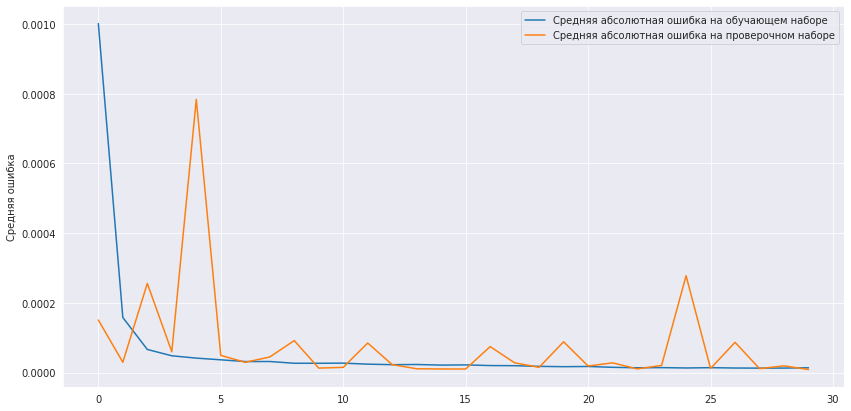

In [35]:
plt.figure(figsize=(14,7))
plt.plot(history_10.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history_10.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [36]:
currModel = modelD #_10 
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) 


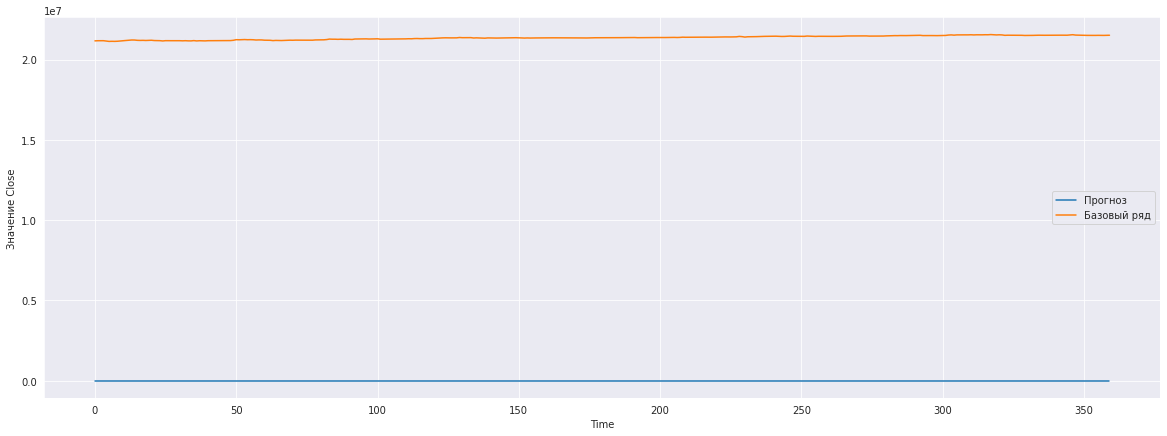

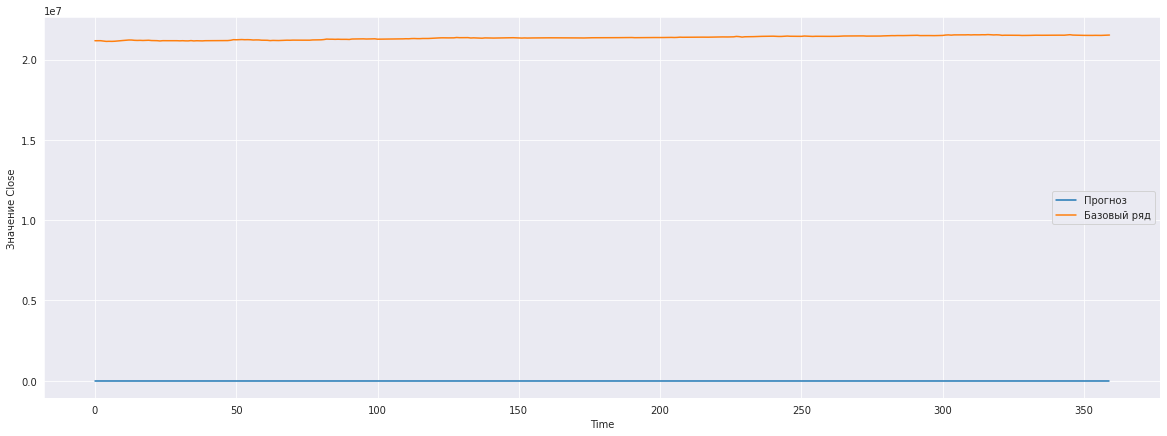

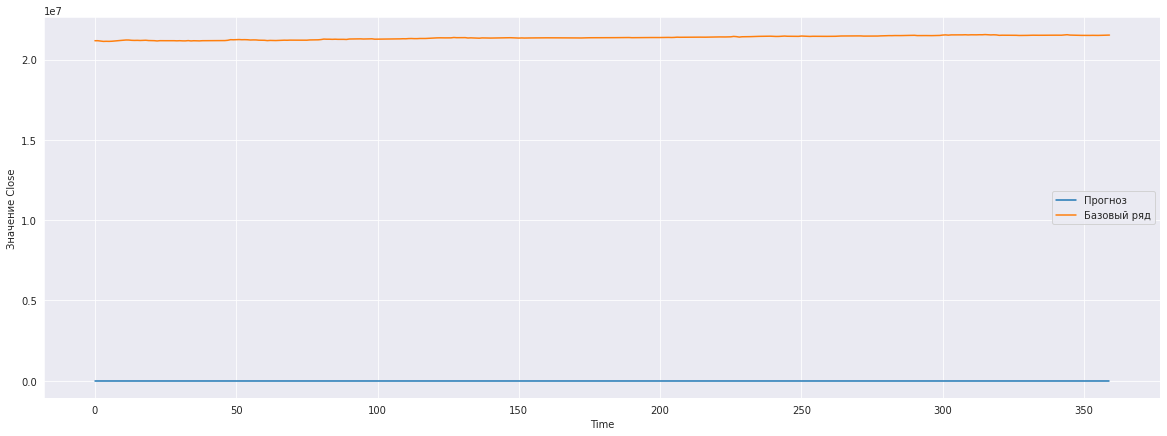

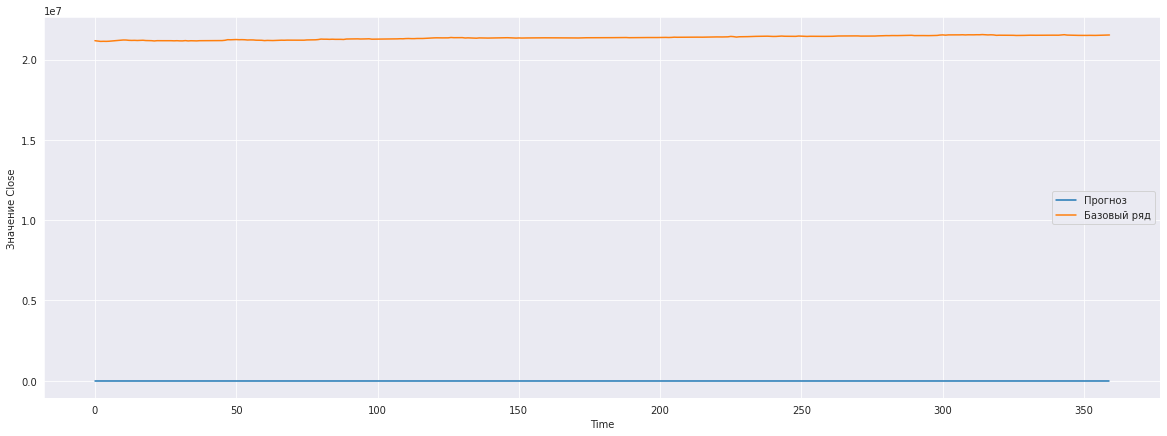

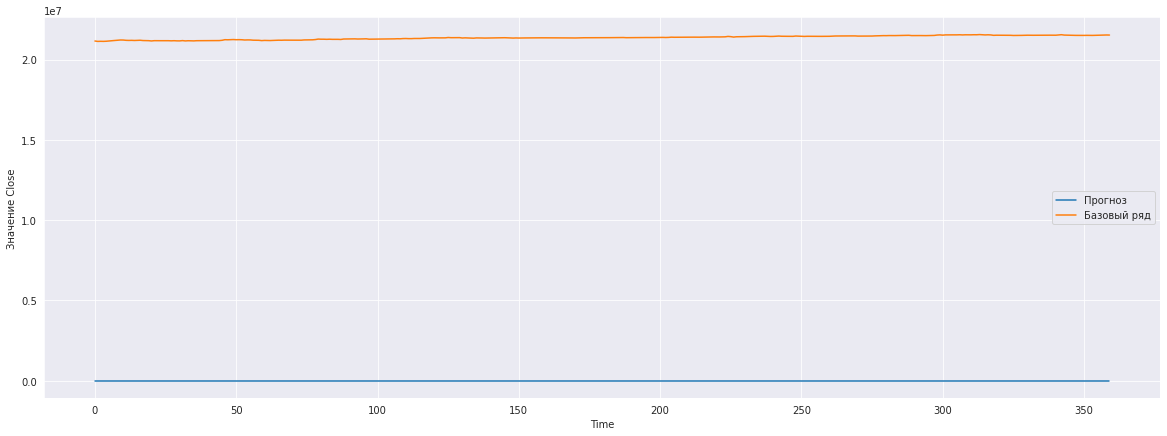

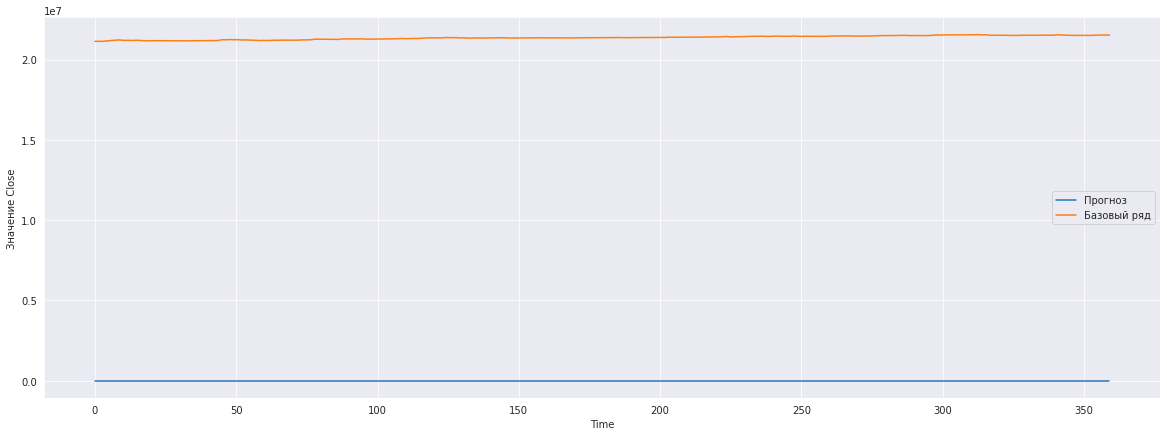

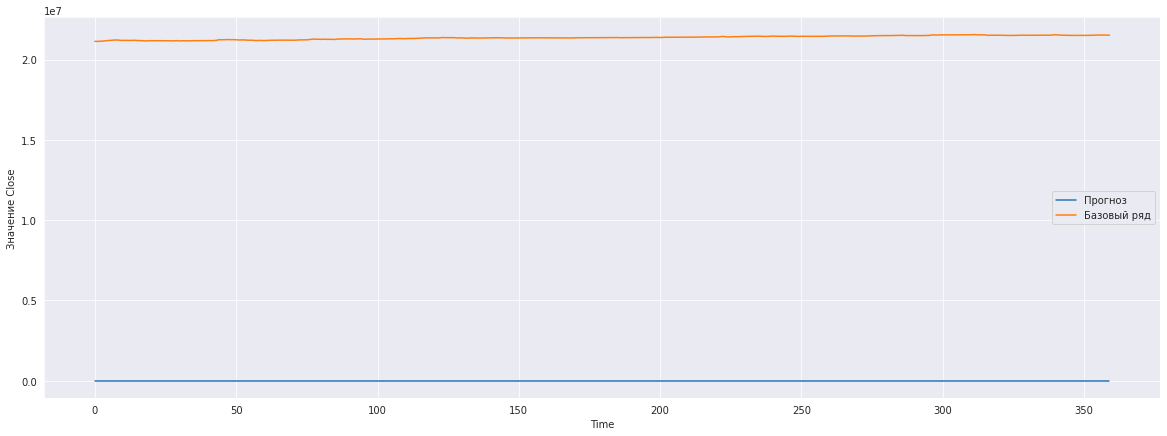

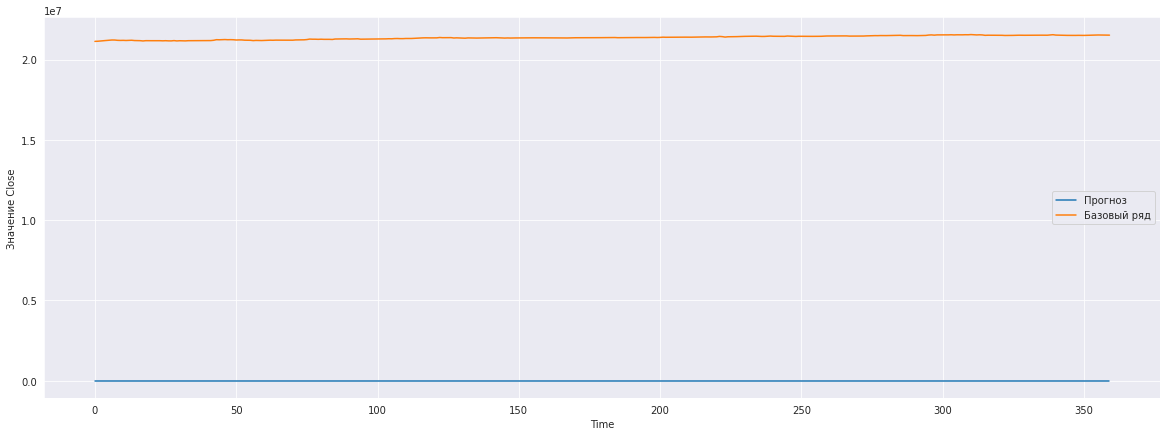

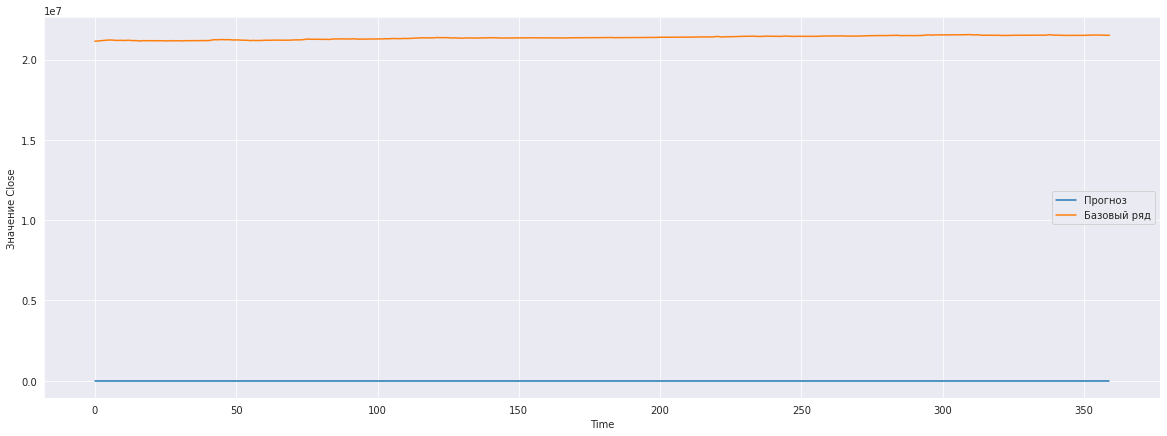

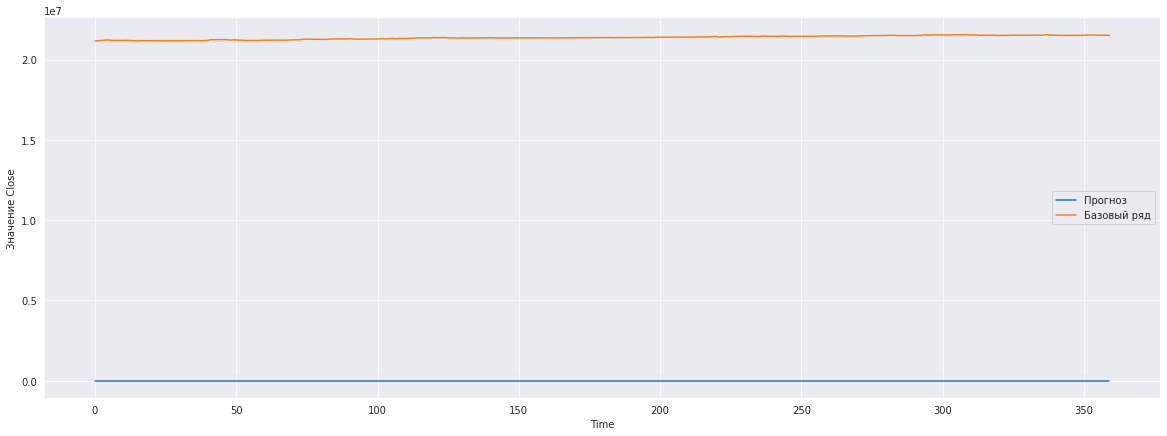

In [37]:
for i in range(10):
  showPredict(0, 360, i, predVal, yValUnscaled)

conv1d

In [38]:
modelC = Sequential()

modelC.add(Conv1D(64, 5, input_shape = (xLen,5), activation="relu"))
modelC.add(Conv1D(32, 5, activation="relu"))
modelC.add(MaxPooling1D())
modelC.add(Flatten())
modelC.add(Dense(128, activation="relu"))
modelC.add(Dense(10, activation="linear"))

modelC.compile(loss="mse", optimizer=Adam(lr=1e-4))
modelC.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 296, 64)           1664      
                                                                 
 conv1d_1 (Conv1D)           (None, 292, 32)           10272     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 146, 32)          0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 4672)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               598144    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

In [39]:
history_C = modelC.fit(trainDataGen, epochs=30, verbose=1, validation_data=testDataGen)

Epoch 1/30
11540/11540 [==============================] - 102s 8ms/step - loss: 4.0354e-04 - val_loss: 1.3341e-04
Epoch 2/30
11540/11540 [==============================] - 95s 8ms/step - loss: 9.3912e-05 - val_loss: 7.5334e-05
Epoch 3/30
11540/11540 [==============================] - 95s 8ms/step - loss: 6.3872e-05 - val_loss: 4.9233e-05
Epoch 4/30
11540/11540 [==============================] - 94s 8ms/step - loss: 5.0359e-05 - val_loss: 7.8091e-05
Epoch 5/30
11540/11540 [==============================] - 94s 8ms/step - loss: 4.3212e-05 - val_loss: 3.0105e-05
Epoch 6/30
11540/11540 [==============================] - 91s 8ms/step - loss: 3.8567e-05 - val_loss: 3.0429e-05
Epoch 7/30
11540/11540 [==============================] - 91s 8ms/step - loss: 3.7018e-05 - val_loss: 5.8590e-05
Epoch 8/30
11540/11540 [==============================] - 91s 8ms/step - loss: 3.4348e-05 - val_loss: 7.3153e-05
Epoch 9/30
11540/11540 [==============================] - 91s 8ms/step - loss: 3.2174e-05 - val

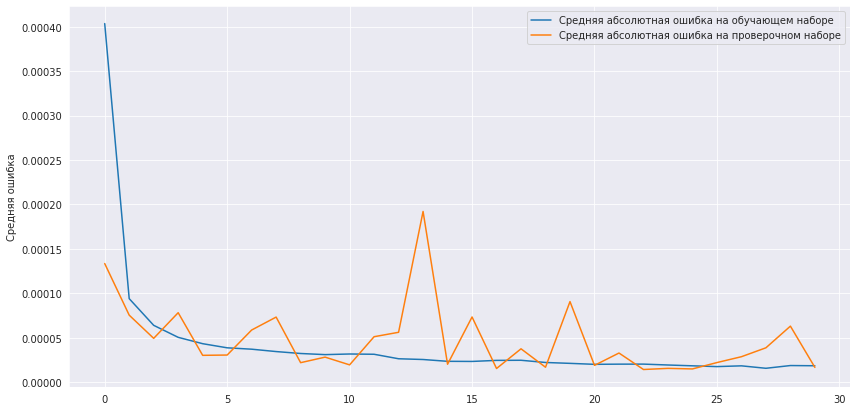

In [40]:
plt.figure(figsize=(14,7))
plt.plot(history_C.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history_C.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

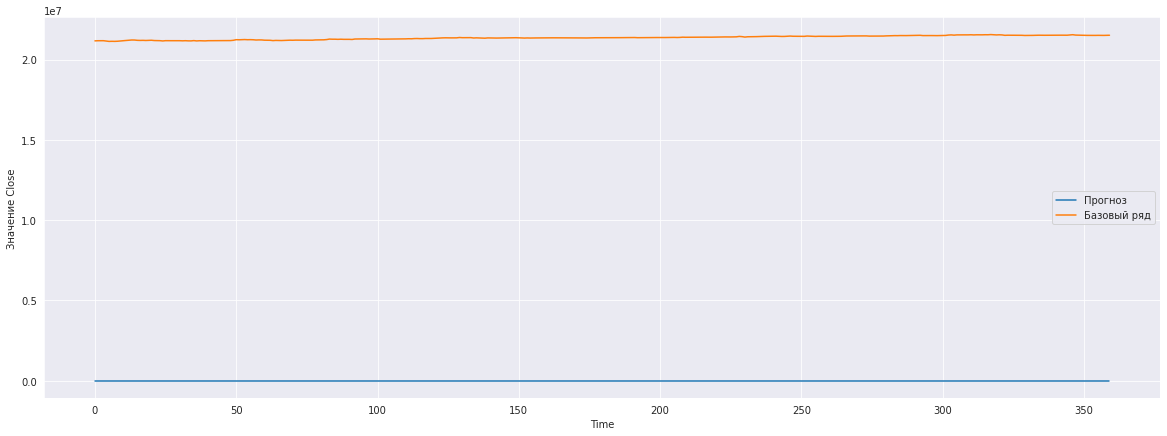

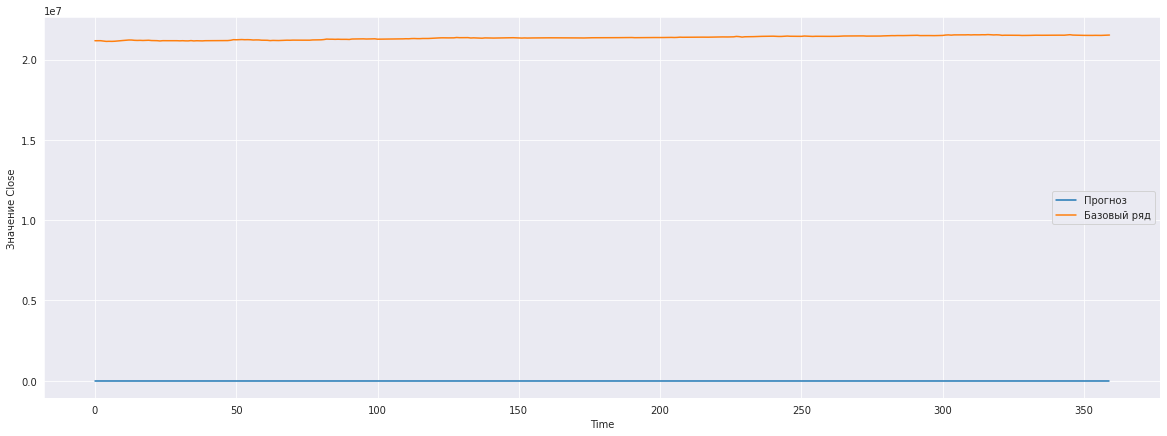

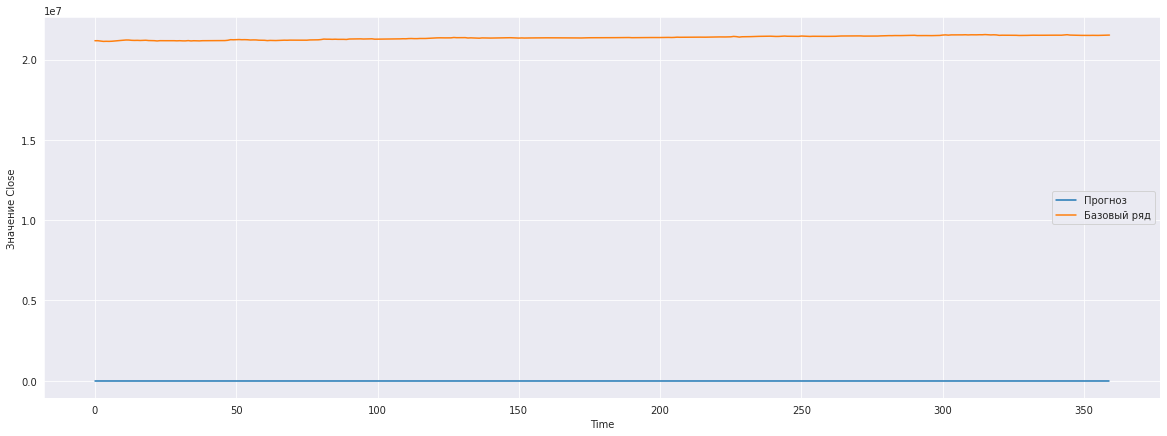

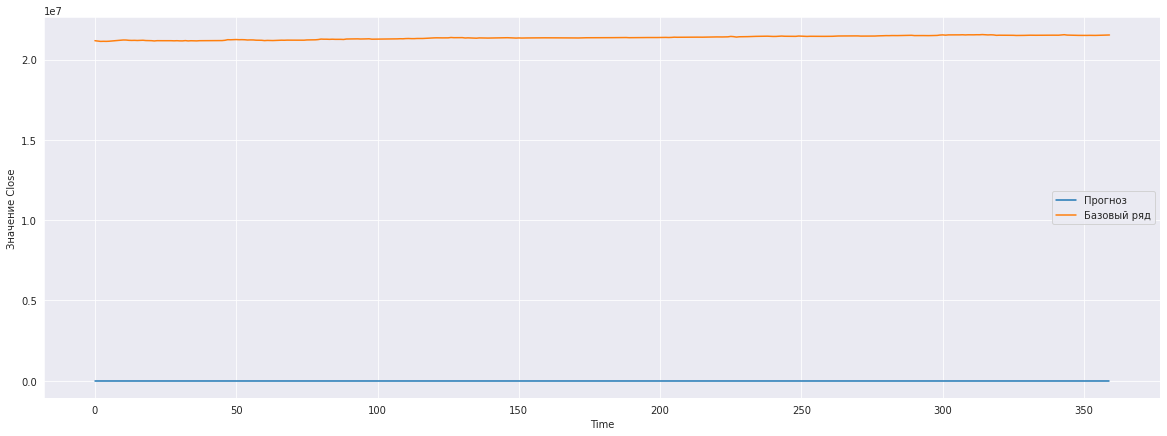

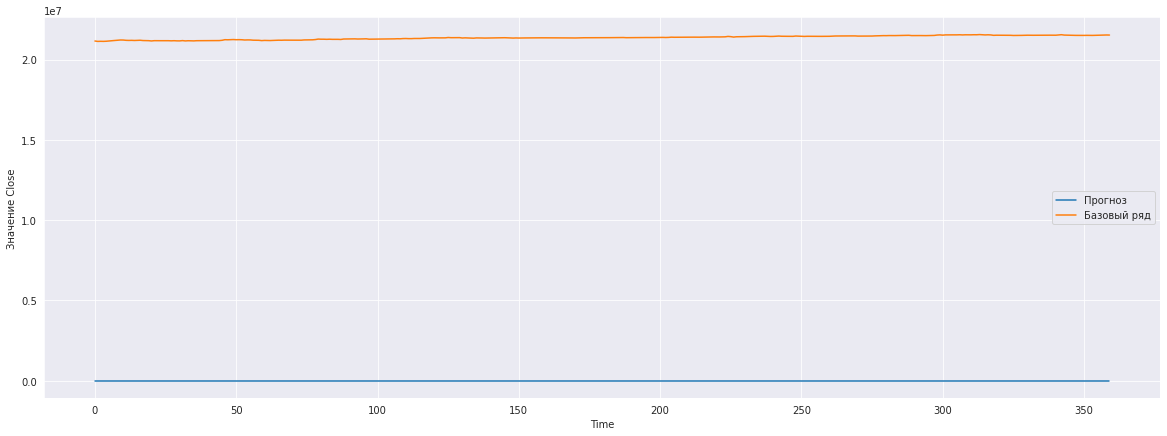

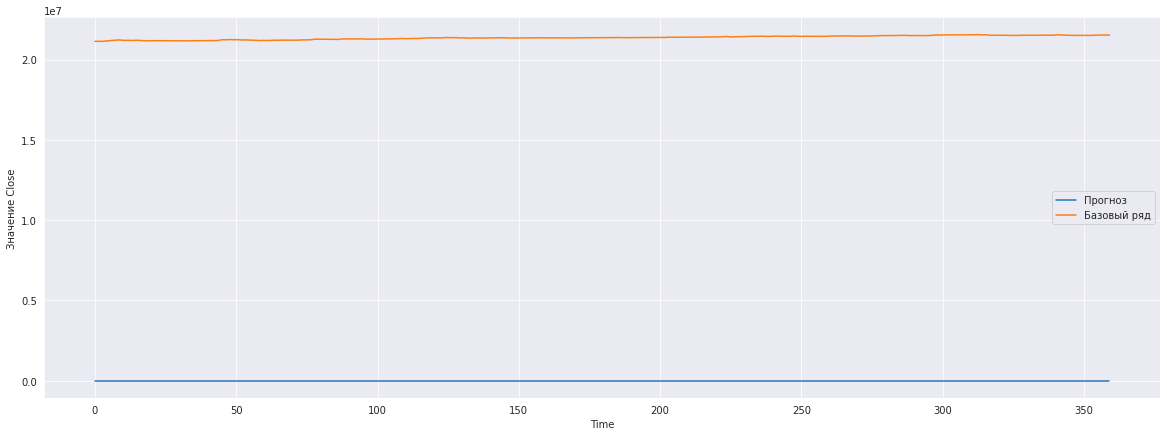

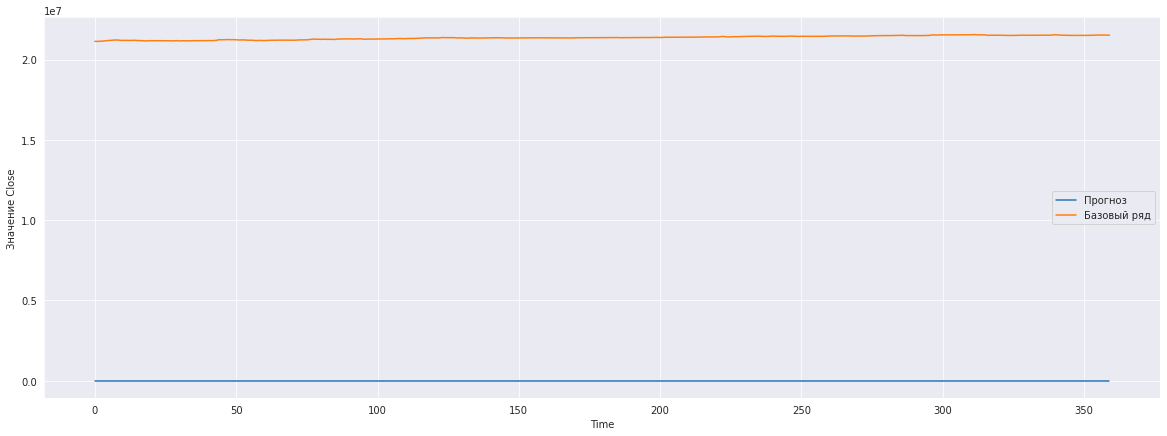

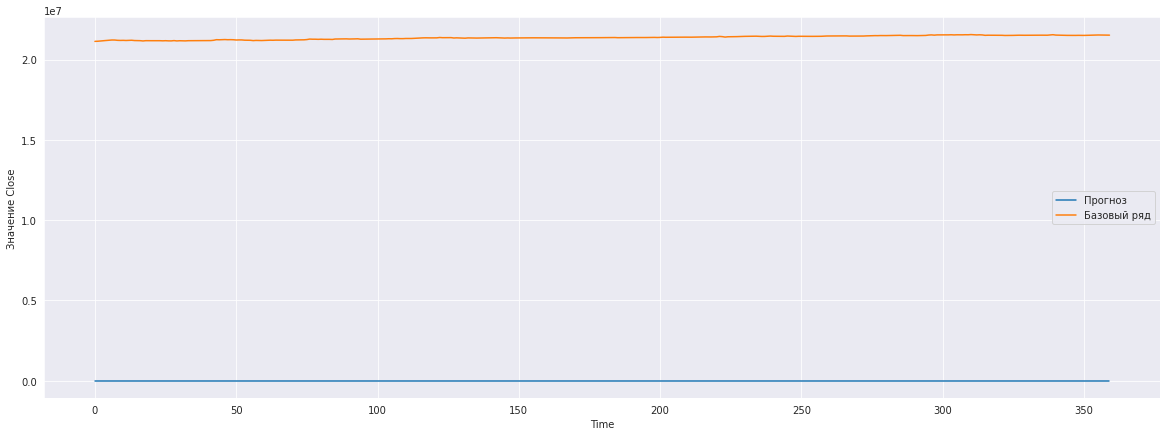

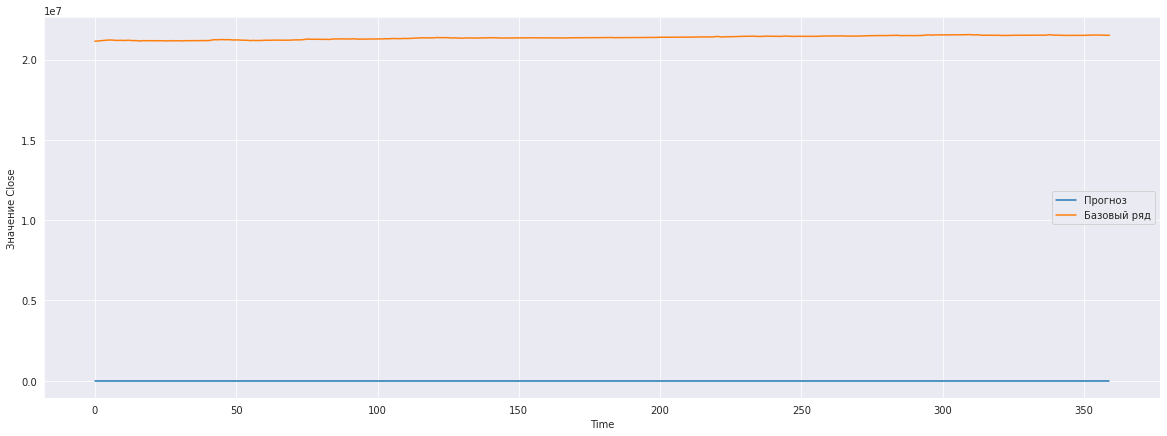

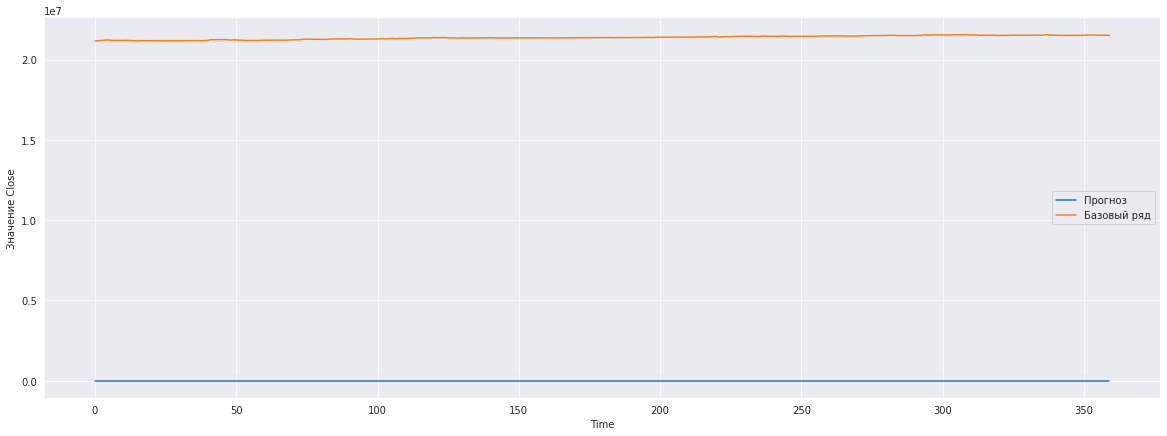

In [41]:
currModel = modelC 
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler)
for i in range(10):
  showPredict(0, 360, i, predVal, yValUnscaled)

***Коэффициент автокорреляции***

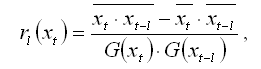

#Прогнозирование акций Лукойл




In [ ]:
#Загружаем библиотеки

import pandas as pd #Пандас
import matplotlib.pyplot as plt #Отрисовка графиков
from tensorflow.keras.utils import to_categorical 
import numpy as np #Numpy
from tensorflow.keras.optimizers import Adam #Оптимизатор
from tensorflow.keras.models import Sequential, Model #Два варианты моделей
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D, MaxPooling1D, RepeatVector #Стандартные слои
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Нормировщики
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # для генерации выборки временных рядов
import warnings
warnings.filterwarnings("ignore")
# Рисовать графики сразу же
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Считываем данные с помощью pandas
base_data = pd.read_csv('/content/drive/My Drive/Data/18_19.csv', sep=';')

# /content/drive/My Drive/Data/SBER_MIN60.txt
# /content/drive/My Drive/Data/18_19.csv

In [ ]:
#Выводим пять первых строк
base_data.head()

,DATE,TIME,OPEN,MAX,MIN,CLOSE,VOLUME
0,03.01.2018,10:00:00,3341.0,3356.0,3340.0,3355.0,6088
1,03.01.2018,10:01:00,3355.0,3359.0,3353.0,3353.0,1624
2,03.01.2018,10:02:00,3351.5,3357.5,3351.5,3357.5,722
3,03.01.2018,10:03:00,3354.5,3360.0,3354.5,3358.0,3034
4,03.01.2018,10:04:00,3358.0,3360.0,3351.5,3360.0,1427


In [ ]:
#Выцепялем numpy значения .values
#И выводим нулевой
txt = base_data.values[0]
print(txt)

['03.01.2018' '10:00:00' 3341.0 3356.0 3340.0 3355.0 6088]


In [ ]:
base_data16 = pd.read_csv('/content/drive/My Drive/Data/16_17.csv', sep=';')
base_data18 = pd.read_csv('/content/drive/My Drive/Data/18_19.csv', sep=';')
data16_17 = base_data16.iloc[:,2:]
data18_19 = base_data18.iloc[:,2:]

In [ ]:
data16_17.shape[0]

263925

In [ ]:
data18_19

,OPEN,MAX,MIN,CLOSE,VOLUME
0,3341.0,3356.0,3340.0,3355.0,6088
1,3355.0,3359.0,3353.0,3353.0,1624
2,3351.5,3357.5,3351.5,3357.5,722
3,3354.5,3360.0,3354.5,3358.0,3034
4,3358.0,3360.0,3351.5,3360.0,1427
...,...,...,...,...,...
217942,5183.5,5183.5,5183.5,5183.5,31523
217943,5183.5,5183.5,5183.5,5183.5,5090
217944,5183.5,5183.5,5183.5,5183.5,230
217945,5183.5,5183.5,5183.5,5183.5,5


In [ ]:
# Выводим параметры одного файла
d = data18_19
print(len(d)) # Сколько есть записей
print(len(d.iloc[0])) # Длина одной строки данных
print(d.iloc[0]) # Пример первой строки данных
print(d.iloc[0][0]) # пример первой записи OPEN


217947
5
OPEN      3341.0
MAX       3356.0
MIN       3340.0
CLOSE     3355.0
VOLUME    6088.0
Name: 0, dtype: float64
3341.0


In [ ]:
# Объединяем базы из двух файлов
data = data16_17.copy()                 # Создаем копию первой базы
data = pd.concat([data16_17,data18_19]) # Присоединяем к ней вторую базу
data = np.array(data)                   # Превращаем в numpy массив

In [ ]:
# Сравниваем размеры
print(len(data16_17)) # Выводим размер первой базы
print(len(data18_19)) # Выводим размер второй базы
print(len(data))      # Выводим размер суммарной базы

263925
217947
481872


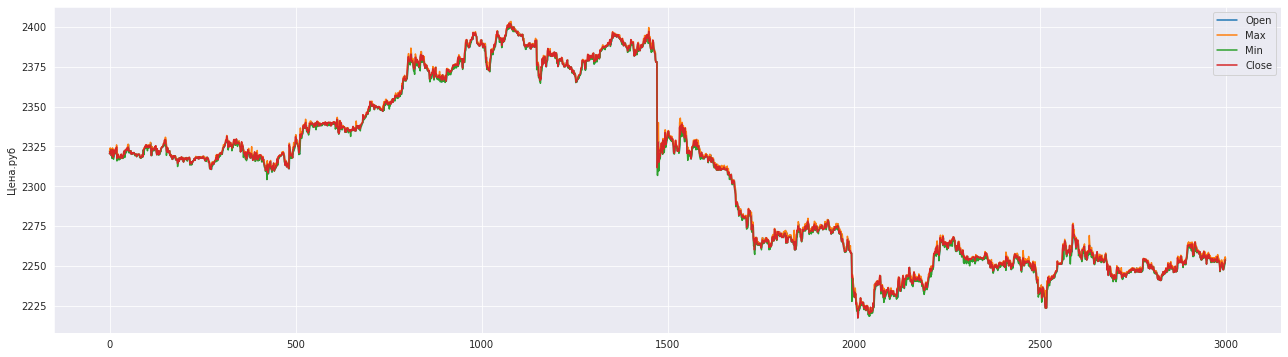

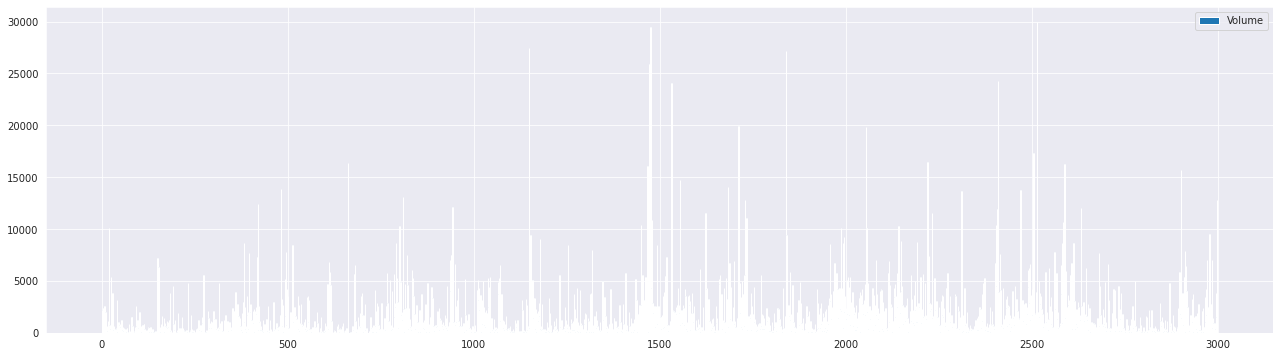

In [ ]:
#Отображаем исходные от точки start и длинной stop
start = 100            #С какой точки начинаем
#stop = data.shape[0] #Сколько точек отрисуем
length = 3000 #Сколько точек отрисуем

#Заполняем текстовые названия каналов данных
chanelNames = ['Open', 'Max', 'Min', 'Close', 'Volume']

#Рисуем все графики данных
#ЧЕтыре основных канала - open, max, min, close
plt.figure(figsize=(22,6))
for i in range(4):
  #Отрисовываем часть данных
  #От начальной точки, до начальной точки + размер шага отрисовки
  plt.plot(data[start:start+length,i], 
          label=chanelNames[i])
plt.ylabel('Цена.руб')
plt.legend()
plt.show()

#Канал volume
plt.figure(figsize=(22,6))
plt.bar(x=np.arange(length), height=data[start:start+length,4], label="Volume")
plt.legend()
plt.show()

### Использование TimeseriesGenerator

In [ ]:
import numpy as np # Подключаем numpy
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # Подлкючаем модуль TimeseriesGenerator

In [ ]:
test_array = np.arange(50) # Создаем тестовый массив из полседовательности чисел от 0 до 50
print(test_array) # Выводим на экран созданный массив

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [ ]:
x_train = test_array # Создаем x_train
y_train = test_array # Создаем y_train

# Создаем генератор
gen = TimeseriesGenerator(
    x_train,
    y_train,
    length= 10, #количество элементов в строке бача
    sampling_rate=1, #частота входящих записей
    stride=1,
    batch_size=5 #количество строк бача Y
    )

In [ ]:
# Формируем цикл for для прохождения по элементам генератора
for i, g in enumerate(gen):
  print('Батч №', i)
  print('x_train:', g[0])
  print('y_train:', g[1])
  print()

Батч № 0
x_train: [[ 0  1  2  3  4  5  6  7  8  9]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]]
y_train: [10 11 12 13 14]

Батч № 1
x_train: [[ 5  6  7  8  9 10 11 12 13 14]
 [ 6  7  8  9 10 11 12 13 14 15]
 [ 7  8  9 10 11 12 13 14 15 16]
 [ 8  9 10 11 12 13 14 15 16 17]
 [ 9 10 11 12 13 14 15 16 17 18]]
y_train: [15 16 17 18 19]

Батч № 2
x_train: [[10 11 12 13 14 15 16 17 18 19]
 [11 12 13 14 15 16 17 18 19 20]
 [12 13 14 15 16 17 18 19 20 21]
 [13 14 15 16 17 18 19 20 21 22]
 [14 15 16 17 18 19 20 21 22 23]]
y_train: [20 21 22 23 24]

Батч № 3
x_train: [[15 16 17 18 19 20 21 22 23 24]
 [16 17 18 19 20 21 22 23 24 25]
 [17 18 19 20 21 22 23 24 25 26]
 [18 19 20 21 22 23 24 25 26 27]
 [19 20 21 22 23 24 25 26 27 28]]
y_train: [25 26 27 28 29]

Батч № 4
x_train: [[20 21 22 23 24 25 26 27 28 29]
 [21 22 23 24 25 26 27 28 29 30]
 [22 23 24 25 26 27 28 29 30 31]
 [23 24 25 26 27 28 29 30 31 32]
 [24 2

In [ ]:
x_train = test_array[:-1] # Создаем x_train
y_train = test_array[1:] # Создаем y_train

# Создаем генератор
gen = TimeseriesGenerator(
    x_train,
    y_train,
    length= 10,
    sampling_rate=1,
    stride=1,
    batch_size=1
    )
# Формируем цикл for для прохождения по элементам генератора
for i, g in enumerate(gen):
  print('Батч №', i)
  print('x_train:', g[0])
  print('y_train:', g[1])
  print()



Батч № 0
x_train: [[0 1 2 3 4 5 6 7 8 9]]
y_train: [11]

Батч № 1
x_train: [[ 1  2  3  4  5  6  7  8  9 10]]
y_train: [12]

Батч № 2
x_train: [[ 2  3  4  5  6  7  8  9 10 11]]
y_train: [13]

Батч № 3
x_train: [[ 3  4  5  6  7  8  9 10 11 12]]
y_train: [14]

Батч № 4
x_train: [[ 4  5  6  7  8  9 10 11 12 13]]
y_train: [15]

Батч № 5
x_train: [[ 5  6  7  8  9 10 11 12 13 14]]
y_train: [16]

Батч № 6
x_train: [[ 6  7  8  9 10 11 12 13 14 15]]
y_train: [17]

Батч № 7
x_train: [[ 7  8  9 10 11 12 13 14 15 16]]
y_train: [18]

Батч № 8
x_train: [[ 8  9 10 11 12 13 14 15 16 17]]
y_train: [19]

Батч № 9
x_train: [[ 9 10 11 12 13 14 15 16 17 18]]
y_train: [20]

Батч № 10
x_train: [[10 11 12 13 14 15 16 17 18 19]]
y_train: [21]

Батч № 11
x_train: [[11 12 13 14 15 16 17 18 19 20]]
y_train: [22]

Батч № 12
x_train: [[12 13 14 15 16 17 18 19 20 21]]
y_train: [23]

Батч № 13
x_train: [[13 14 15 16 17 18 19 20 21 22]]
y_train: [24]

Батч № 14
x_train: [[14 15 16 17 18 19 20 21 22 23]]
y_train: [25]



In [ ]:
x_train = test_array # Создаем x_train
y_train = [[x, x+1] for x in range(50)] # Создаем y_train

# Создаем генератор
gen = TimeseriesGenerator(
    x_train,
    y_train,
    length= 10,
    sampling_rate=1,
    stride=1,
    batch_size=1
    )
# Формируем цикл for для прохождения по элементам генератора
for i, g in enumerate(gen):
  print('Батч №', i)
  print('x_train:', g[0])
  print('y_train:', g[1])
  print()

Батч № 0
x_train: [[0 1 2 3 4 5 6 7 8 9]]
y_train: [[10 11]]

Батч № 1
x_train: [[ 1  2  3  4  5  6  7  8  9 10]]
y_train: [[11 12]]

Батч № 2
x_train: [[ 2  3  4  5  6  7  8  9 10 11]]
y_train: [[12 13]]

Батч № 3
x_train: [[ 3  4  5  6  7  8  9 10 11 12]]
y_train: [[13 14]]

Батч № 4
x_train: [[ 4  5  6  7  8  9 10 11 12 13]]
y_train: [[14 15]]

Батч № 5
x_train: [[ 5  6  7  8  9 10 11 12 13 14]]
y_train: [[15 16]]

Батч № 6
x_train: [[ 6  7  8  9 10 11 12 13 14 15]]
y_train: [[16 17]]

Батч № 7
x_train: [[ 7  8  9 10 11 12 13 14 15 16]]
y_train: [[17 18]]

Батч № 8
x_train: [[ 8  9 10 11 12 13 14 15 16 17]]
y_train: [[18 19]]

Батч № 9
x_train: [[ 9 10 11 12 13 14 15 16 17 18]]
y_train: [[19 20]]

Батч № 10
x_train: [[10 11 12 13 14 15 16 17 18 19]]
y_train: [[20 21]]

Батч № 11
x_train: [[11 12 13 14 15 16 17 18 19 20]]
y_train: [[21 22]]

Батч № 12
x_train: [[12 13 14 15 16 17 18 19 20 21]]
y_train: [[22 23]]

Батч № 13
x_train: [[13 14 15 16 17 18 19 20 21 22]]
y_train: [[23 24]]

In [ ]:
y_train = [[x, x+1] for x in range(50)]
print(y_train)

[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 15], [15, 16], [16, 17], [17, 18], [18, 19], [19, 20], [20, 21], [21, 22], [22, 23], [23, 24], [24, 25], [25, 26], [26, 27], [27, 28], [28, 29], [29, 30], [30, 31], [31, 32], [32, 33], [33, 34], [34, 35], [35, 36], [36, 37], [37, 38], [38, 39], [39, 40], [40, 41], [41, 42], [42, 43], [43, 44], [44, 45], [45, 46], [46, 47], [47, 48], [48, 49], [49, 50]]


### Функция загрузки данных




In [ ]:
#Формируем параметры загрузки данных

xLen = 300                      #Анализируем по 300 прошедшим точкам 
valLen = 30000                  #Используем 30.000 записей для проверки

trainLen = data.shape[0]-valLen # Размер тренировочной выборкb
#Делим данные на тренировочную и тестовую выборки 
xTrain, xTest = data[:trainLen], data[trainLen+xLen+2:]

#Масштабируем данные (отдельно для X и Y), чтобы их легче было скормить сетке
xScaler = MinMaxScaler()
xScaler.fit(xTrain)
xTrain = xScaler.transform(xTrain)
xTest = xScaler.transform(xTest)

#Делаем reshape,т.к. у нас только один столбец по одному значению
yTrain, yTest = np.reshape(data[:trainLen,3],(-1,1)), np.reshape(data[trainLen+xLen+2:,3],(-1,1)) 
yScaler = MinMaxScaler()
yScaler.fit(yTrain)
yTrain = yScaler.transform(yTrain)
yTest = yScaler.transform(yTest)

#Создаем генератор для обучения
trainDataGen = TimeseriesGenerator(xTrain, yTrain,           #В качестве параметров наши выборки
                               length=xLen, stride=1, sampling_rate=1, #Для каждой точки (из промежутка длины xLen)
                               batch_size=20)                #Размер batch, который будем скармливать модели

#Создаем аналогичный генератор для валидации при обучении
testDataGen = TimeseriesGenerator(xTest, yTest,
                               length=xLen, stride=1,
                               batch_size=20)

In [ ]:
print(trainDataGen[0][0].shape,
      trainDataGen[0][1].shape)

(20, 300, 5) (20, 1)


## Полносвязная сеть




## Визуализация результатов


In [ ]:
# Функция рассчитываем результаты прогнозирования сети
# В аргументы принимает сеть (currModel) и проверочную выборку
# Выдаёт результаты предсказания predVal
# И правильные ответы в исходной размерности yValUnscaled (какими они были до нормирования)
def getPred(currModel, xVal, yVal, yScaler):
  # Предсказываем ответ сети по проверочной выборке
  # И возвращаем исходны масштаб данных, до нормализации
  predVal = yScaler.inverse_transform(currModel.predict(xVal))
  yValUnscaled = yScaler.inverse_transform(yVal)
  
  return (predVal, yValUnscaled)

# Функция визуализирует графики, что предсказала сеть и какие были правильные ответы
# start - точка с которой начинаем отрисовку графика
# step - длина графика, которую отрисовываем
# channel - какой канал отрисовываем
def showPredict(start, step, channel, predVal, yValUnscaled):
  plt.figure(figsize=(22,6))
  plt.plot(predVal[start:start+step, 0],
           label='Прогноз')
  plt.plot(yValUnscaled[start:start+step, channel], 
           label='Базовый ряд')
  plt.xlabel('Время')
  plt.ylabel('Значение Close')
  plt.legend()
  plt.show()
  
# Функция расёта корреляции дух одномерных векторов
def correlate(a, b):
  # Рассчитываем основные показатели
  ma = a.mean() # Среднее значение первого вектора
  mb = b.mean() # Среднее значение второго вектора
  mab = (a*b).mean() # Среднее значение произведения векторов
  sa = a.std() # Среднеквадратичное отклонение первого вектора
  sb = b.std() # Среднеквадратичное отклонение второго вектора
  
  #Рассчитываем корреляцию
  val = 1
  if ((sa>0) & (sb>0)):
    val = (mab-ma*mb)/(sa*sb)
  return val

# Функция рисуем корреляцию прогнозированного сигнала с правильным
# Смещая на различное количество шагов назад
# Для проверки появления эффекта автокорреляции
# channels - по каким каналам отображать корреляцию
# corrSteps - на какое количество шагов смещать сигнал назад для рассчёта корреляции
def showCorr(channels, corrSteps, predVal, yValUnscaled):
  # Проходим по всем каналам
  for ch in channels:
    corr = [] # Создаём пустой лист, в нём будут корреляции при смезении на i рагов обратно
    yLen = yValUnscaled.shape[0] # Запоминаем размер проверочной выборки

      # Постепенно увеличикаем шаг, насколько смещаем сигнал для проверки автокорреляции
    for i in range(corrSteps):
      # Получаем сигнал, смещённый на i шагов назад
      # predVal[i:, ch]
      # Сравниваем его с верными ответами, без смещения назад
      # yValUnscaled[:yLen-i,ch]
      # Рассчитываем их корреляцию и добавляем в лист
      corr.append(correlate(yValUnscaled[:yLen-i,ch], predVal[i:, 0]))

    own_corr = [] # Создаём пустой лист, в нём будут корреляции при смезении на i рагов обратно

      # Постепенно увеличикаем шаг, насколько смещаем сигнал для проверки автокорреляции
    for i in range(corrSteps):
      # Получаем сигнал, смещённый на i шагов назад
      # predVal[i:, ch]
      # Сравниваем его с верными ответами, без смещения назад
      # yValUnscaled[:yLen-i,ch]
      # Рассчитываем их корреляцию и добавляем в лист
      own_corr.append(correlate(yValUnscaled[:yLen-i,ch], yValUnscaled[i:, ch]))

    # Отображаем график коррелций для данного шага
    plt.figure(figsize=(14,7))
    plt.plot(corr, label='Предсказание на ' + str(ch+1) + ' шаг')
    plt.plot(own_corr, label='Эталон')

  plt.xlabel('Время')
  plt.ylabel('Значение')
  plt.legend()
  plt.show()

In [ ]:
#Создадим генератор проверочной выборки, из которой потом вытащим xVal, yVal для проверки
DataGen = TimeseriesGenerator(xTest, yTest,
                               length=300, sampling_rate=1,
                               batch_size=len(xTest)) #размер batch будет равен длине нашей выборки
xVal = []
yVal = []
for i in DataGen:
  xVal.append(i[0])
  yVal.append(i[1])

xVal = np.array(xVal)
yVal = np.array(yVal)
xVal[0]

array([[[7.79871033e-01, 7.79570029e-01, 7.80161400e-01, 7.79640446e-01,
         1.38722694e-04],
        [7.79744595e-01, 7.79316806e-01, 7.80034911e-01, 7.79514021e-01,
         7.44354324e-04],
        [7.79618157e-01, 7.79190195e-01, 7.80161400e-01, 7.79514021e-01,
         9.35679919e-05],
        ...,
        [7.73801998e-01, 7.73619306e-01, 7.74216398e-01, 7.73951301e-01,
         3.39591294e-04],
        [7.74054874e-01, 7.74632195e-01, 7.74469377e-01, 7.74962704e-01,
         3.63099670e-04],
        [7.74939942e-01, 7.74505584e-01, 7.74848845e-01, 7.74204152e-01,
         1.62463827e-04]],

       [[7.79744595e-01, 7.79316806e-01, 7.80034911e-01, 7.79514021e-01,
         7.44354324e-04],
        [7.79618157e-01, 7.79190195e-01, 7.80161400e-01, 7.79514021e-01,
         9.35679919e-05],
        [7.79618157e-01, 7.79316806e-01, 7.80034911e-01, 7.79640446e-01,
         3.37729244e-04],
        ...,
        [7.74054874e-01, 7.74632195e-01, 7.74469377e-01, 7.74962704e-01,
        

## Dense-сетка

### Эксп. №1

In [ ]:
#Создаём нейронку
modelD = Sequential()
modelD.add(Dense(150,input_shape = (xLen,5), activation="relu" )) # 5 - количество каналов
modelD.add(Flatten())
modelD.add(Dense(1, activation="linear"))

#Компилируем
modelD.compile(loss="mse", optimizer=Adam(lr=1e-4))

modelD.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 300, 150)          900       
                                                                 
 flatten_1 (Flatten)         (None, 45000)             0         
                                                                 
 dense_3 (Dense)             (None, 1)                 45001     
                                                                 
Total params: 45,901
Trainable params: 45,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Запускаем обучение
history = modelD.fit(
                    trainDataGen, 
                    epochs=50, 
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/50
22579/22579 [==============================] - 102s 4ms/step - loss: 9.5043e-04 - val_loss: 4.0572e-05
Epoch 2/50
22579/22579 [==============================] - 101s 4ms/step - loss: 8.3424e-05 - val_loss: 3.6335e-05
Epoch 3/50
22579/22579 [==============================] - 101s 4ms/step - loss: 5.4507e-05 - val_loss: 1.4885e-05
Epoch 4/50
22579/22579 [==============================] - 101s 4ms/step - loss: 3.1783e-05 - val_loss: 3.2245e-05
Epoch 5/50
22579/22579 [==============================] - 100s 4ms/step - loss: 2.2994e-05 - val_loss: 1.5442e-05
Epoch 6/50
22579/22579 [==============================] - 100s 4ms/step - loss: 2.0488e-05 - val_loss: 2.7740e-05
Epoch 7/50
22579/22579 [==============================] - 100s 4ms/step - loss: 1.7233e-05 - val_loss: 1.5301e-05
Epoch 8/50
22579/22579 [==============================] - 100s 4ms/step - loss: 1.5508e-05 - val_loss: 1.9808e-05
Epoch 9/50
22579/22579 [==============================] - 101s 4ms/step - loss: 1.4460e-

In [ ]:
#Компилируем
modelD.compile(loss="mse", optimizer=Adam(lr=1e-5))
#Запускаем обучение
history = modelD.fit(
                    trainDataGen, 
                    epochs=50, 
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/50
22579/22579 [==============================] - 112s 5ms/step - loss: 2.7826e-04 - val_loss: 5.9249e-05
Epoch 2/50
22579/22579 [==============================] - 101s 4ms/step - loss: 6.9420e-05 - val_loss: 1.2480e-04
Epoch 3/50
22579/22579 [==============================] - 101s 4ms/step - loss: 6.3367e-05 - val_loss: 3.9426e-05
Epoch 4/50
22579/22579 [==============================] - 100s 4ms/step - loss: 5.0670e-05 - val_loss: 1.8457e-05
Epoch 5/50
22579/22579 [==============================] - 110s 5ms/step - loss: 4.9566e-05 - val_loss: 3.5567e-05
Epoch 6/50
22579/22579 [==============================] - 100s 4ms/step - loss: 3.7263e-05 - val_loss: 1.1216e-04
Epoch 7/50
22579/22579 [==============================] - 100s 4ms/step - loss: 3.5973e-05 - val_loss: 1.0508e-05
Epoch 8/50
22579/22579 [==============================] - 101s 4ms/step - loss: 3.3140e-05 - val_loss: 2.4665e-05
Epoch 9/50
22579/22579 [==============================] - 100s 4ms/step - loss: 2.8800e-

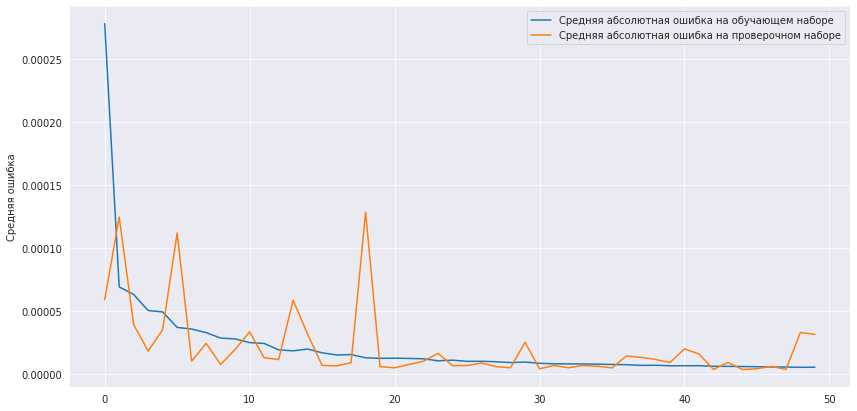

In [ ]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
#Компилируем
modelD.compile(loss="mse", optimizer=Adam(lr=1e-6))
#Запускаем обучение
history = modelD.fit(
                    trainDataGen, 
                    epochs=50, 
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/50
22579/22579 [==============================] - 103s 5ms/step - loss: 2.4324e-06 - val_loss: 4.1738e-06
Epoch 2/50
22579/22579 [==============================] - 104s 5ms/step - loss: 2.4021e-06 - val_loss: 4.7310e-06
Epoch 3/50
22579/22579 [==============================] - 104s 5ms/step - loss: 2.3525e-06 - val_loss: 4.9653e-06
Epoch 4/50
22579/22579 [==============================] - 103s 5ms/step - loss: 2.3361e-06 - val_loss: 3.4658e-06
Epoch 5/50
22579/22579 [==============================] - 102s 5ms/step - loss: 2.3186e-06 - val_loss: 3.4666e-06
Epoch 6/50
22579/22579 [==============================] - 104s 5ms/step - loss: 2.3072e-06 - val_loss: 3.4001e-06
Epoch 7/50
22579/22579 [==============================] - 104s 5ms/step - loss: 2.2921e-06 - val_loss: 3.6059e-06
Epoch 8/50
22579/22579 [==============================] - 106s 5ms/step - loss: 2.2769e-06 - val_loss: 3.4199e-06
Epoch 9/50
22579/22579 [==============================] - 102s 5ms/step - loss: 2.2624e-

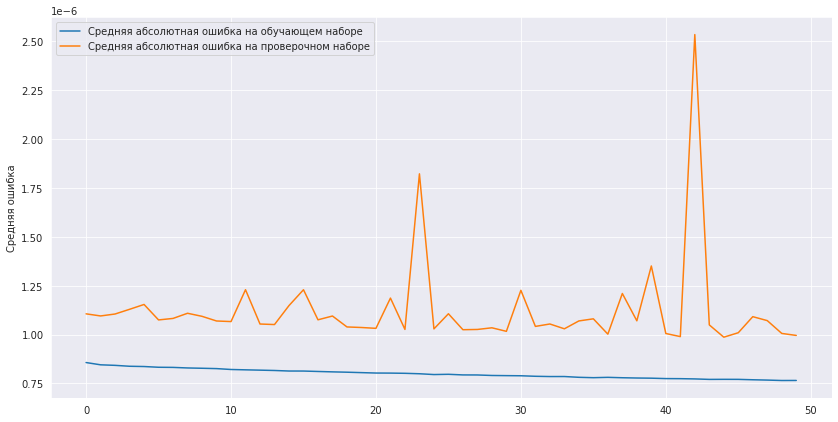

In [ ]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

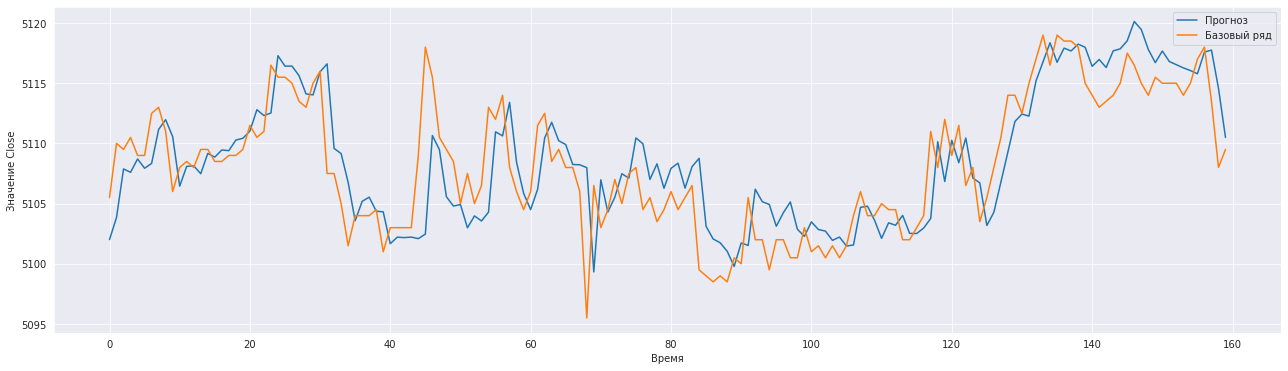

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal, yValUnscaled)


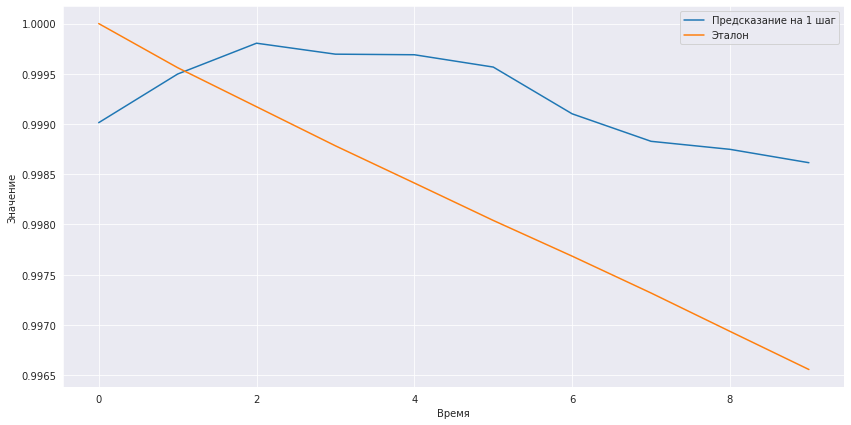

In [ ]:
#Отображаем корреляцию
#Используем выходной канал - только open
#Проверяем корреляцию на глубину 60 шагов
showCorr([0], 10, predVal, yValUnscaled)

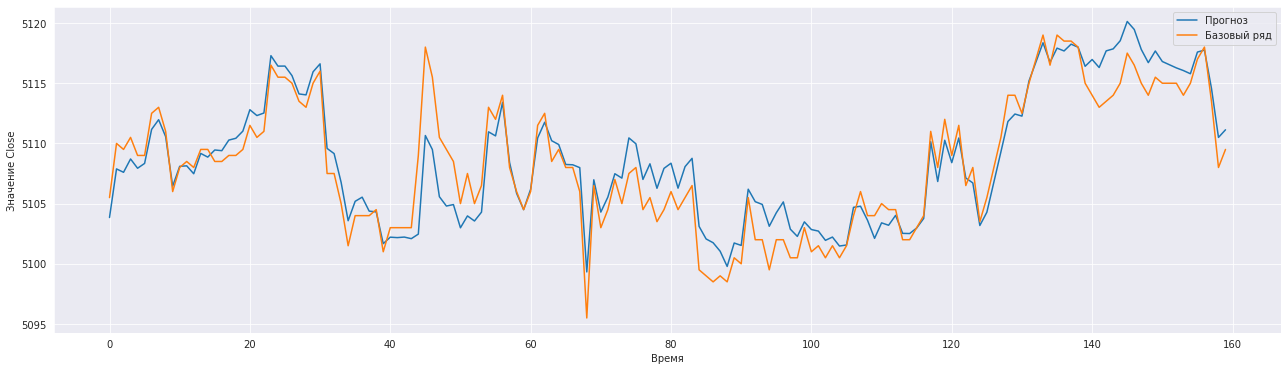

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[1:], yValUnscaled[:-1])


### Эксп. №2

In [ ]:
#Создаём нейронку
modelD_2 = Sequential()
modelD_2.add(Flatten(input_shape = (xLen,5)))
modelD_2.add(Dense(150, activation="relu" )) # 5 - количество каналов
modelD_2.add(Dense(1, activation="linear"))

#Компилируем
modelD_2.compile(loss="mse", optimizer=Adam(lr=1e-4))

modelD_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1500)              0         
_________________________________________________________________
dense (Dense)                (None, 150)               225150    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 225,301
Trainable params: 225,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Запускаем обучение
history = modelD_2.fit(
                    trainDataGen, 
                    epochs=20, 
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/20
22579/22579 [==============================] - 41s 2ms/step - loss: 0.0623 - val_loss: 0.0078
Epoch 2/20
22579/22579 [==============================] - 37s 2ms/step - loss: 0.0183 - val_loss: 8.9653e-05
Epoch 3/20
22579/22579 [==============================] - 37s 2ms/step - loss: 0.0015 - val_loss: 0.0340
Epoch 4/20
22579/22579 [==============================] - 37s 2ms/step - loss: 4.1847e-04 - val_loss: 3.5239e-05
Epoch 5/20
22579/22579 [==============================] - 37s 2ms/step - loss: 8.7764e-05 - val_loss: 4.9099e-05
Epoch 6/20
22579/22579 [==============================] - 37s 2ms/step - loss: 5.1872e-05 - val_loss: 1.8981e-05
Epoch 7/20
22579/22579 [==============================] - 37s 2ms/step - loss: 5.2639e-05 - val_loss: 1.5153e-04
Epoch 8/20
22579/22579 [==============================] - 37s 2ms/step - loss: 3.3439e-05 - val_loss: 9.0700e-05
Epoch 9/20
22579/22579 [==============================] - 37s 2ms/step - loss: 3.1610e-05 - val_loss: 2.4546e-05
Epo

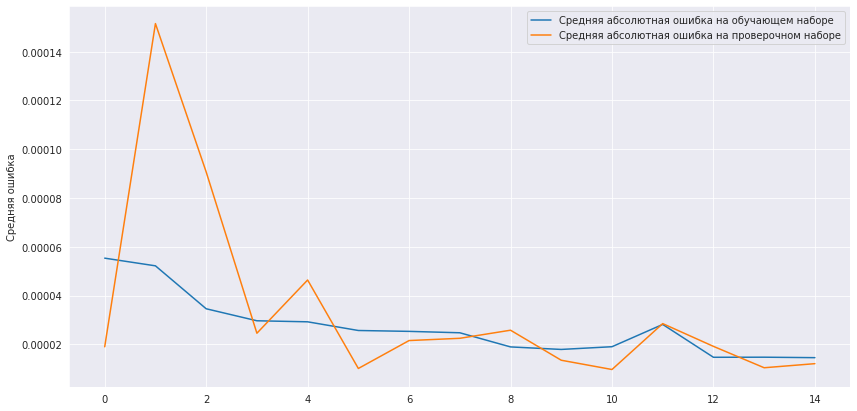

In [ ]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'][5:], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'][5:], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

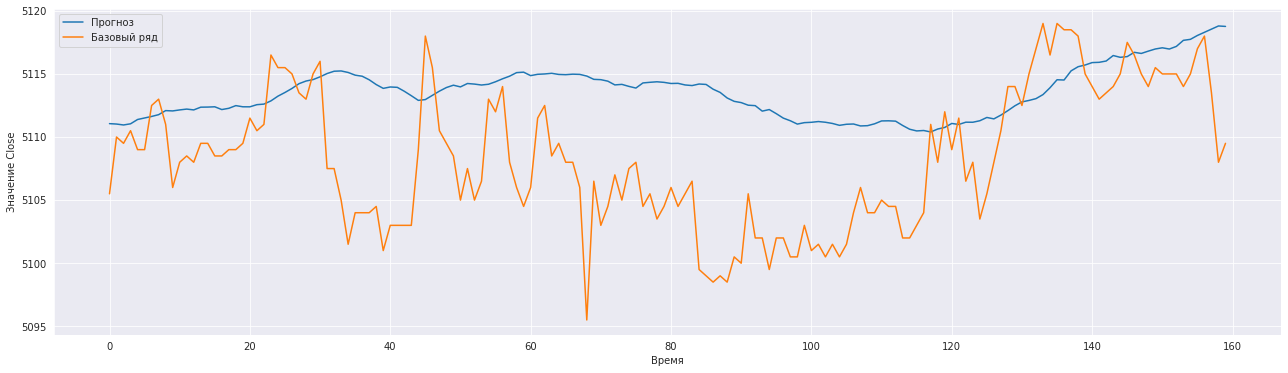

In [ ]:
#Прогнозируем данные текущей сетью
(predVal, yValUnscaled) = getPred(modelD_2, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal, yValUnscaled)


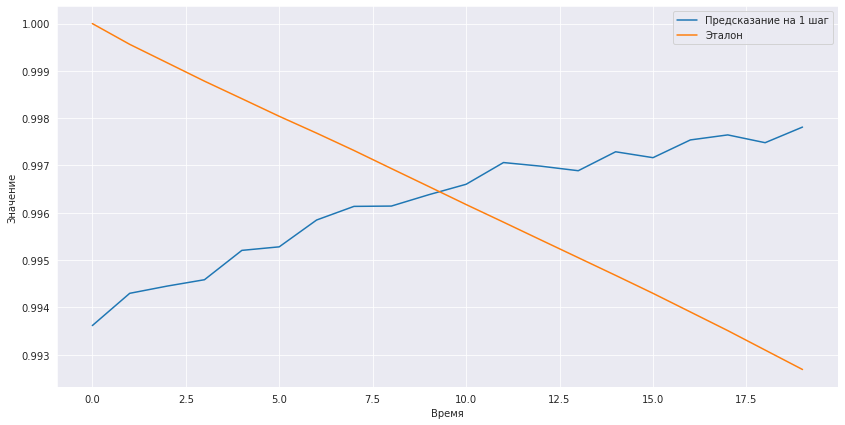

In [ ]:
#Отображаем корреляцию
#Используем выходной канал - только open
#Проверяем корреляцию на глубину 60 шагов
showCorr([0], 20, predVal, yValUnscaled)

In [ ]:
modelD_2.compile(loss="mse", optimizer=Adam(lr=1e-5))
#Запускаем обучение
history = modelD_2.fit(
                    trainDataGen, 
                    epochs=20, 
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/20
22579/22579 [==============================] - 37s 2ms/step - loss: 4.9901e-06 - val_loss: 7.3049e-06
Epoch 2/20
22579/22579 [==============================] - 36s 2ms/step - loss: 4.9606e-06 - val_loss: 9.1494e-06
Epoch 3/20
22579/22579 [==============================] - 37s 2ms/step - loss: 4.8602e-06 - val_loss: 6.6686e-06
Epoch 4/20
22579/22579 [==============================] - 36s 2ms/step - loss: 4.8936e-06 - val_loss: 6.7183e-06
Epoch 5/20
22579/22579 [==============================] - 37s 2ms/step - loss: 4.5974e-06 - val_loss: 2.0762e-05
Epoch 6/20
22579/22579 [==============================] - 37s 2ms/step - loss: 4.4930e-06 - val_loss: 6.5522e-06
Epoch 7/20
22579/22579 [==============================] - 37s 2ms/step - loss: 4.5187e-06 - val_loss: 6.2119e-06
Epoch 8/20
22579/22579 [==============================] - 37s 2ms/step - loss: 4.4075e-06 - val_loss: 6.0052e-06
Epoch 9/20
22579/22579 [==============================] - 38s 2ms/step - loss: 4.3446e-06 - val_

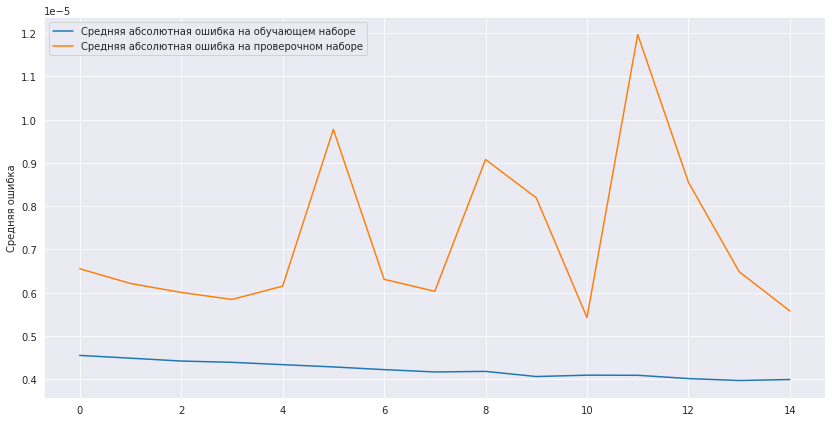

In [ ]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'][5:], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'][5:], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

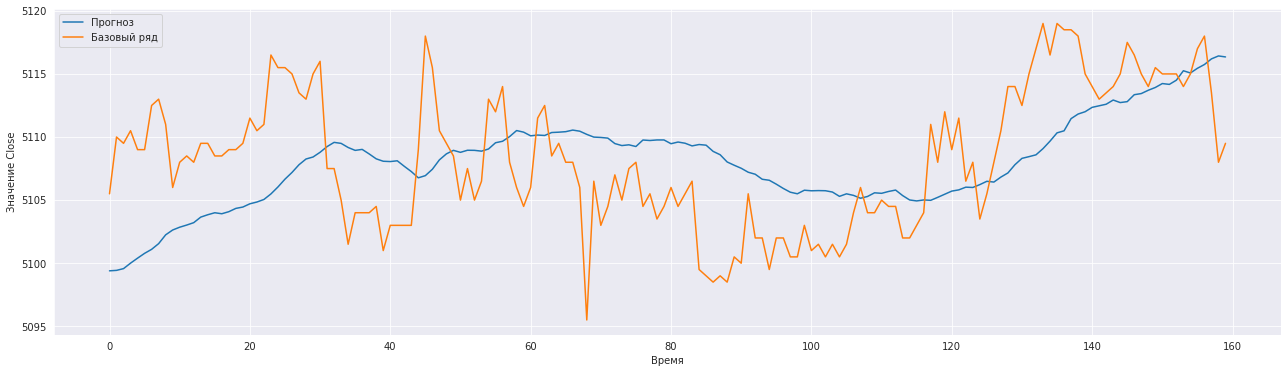

In [ ]:
#Прогнозируем данные текущей сетью
(predVal, yValUnscaled) = getPred(modelD_2, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal, yValUnscaled)


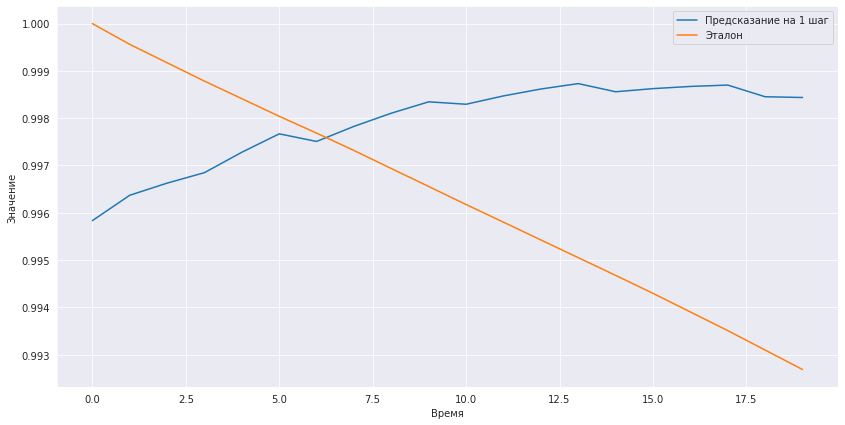

In [ ]:
#Отображаем корреляцию
#Используем выходной канал - только open
#Проверяем корреляцию на глубину 60 шагов
showCorr([0], 20, predVal, yValUnscaled)

## Одномерная свёртка



In [ ]:
modelC = Sequential()

modelC.add(Conv1D(64, 5, input_shape = (xLen,5), activation="relu"))
modelC.add(Conv1D(64, 5, activation="relu"))
modelC.add(MaxPooling1D())
modelC.add(Flatten())
modelC.add(Dense(100, activation="relu"))
modelC.add(Dense(1, activation="linear"))

modelC.compile(loss="mse", optimizer=Adam(lr=1e-4))

modelC.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 296, 64)           1664      
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 292, 64)           20544     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 146, 64)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9344)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               934500    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 956,809
Trainable params: 956,809
Non-trainable params: 0
________________________________________________

In [ ]:
history = modelC.fit(trainDataGen,
                    epochs=50, 
                    verbose=1,
                    validation_data=testDataGen)

Epoch 1/50
22579/22579 [==============================] - 50s 2ms/step - loss: 0.0076 - val_loss: 1.4778e-04
Epoch 2/50
22579/22579 [==============================] - 51s 2ms/step - loss: 4.6624e-04 - val_loss: 1.1642e-04
Epoch 3/50
22579/22579 [==============================] - 50s 2ms/step - loss: 1.8305e-04 - val_loss: 1.8813e-04
Epoch 4/50
22579/22579 [==============================] - 50s 2ms/step - loss: 1.2221e-04 - val_loss: 1.5788e-05
Epoch 5/50
22579/22579 [==============================] - 52s 2ms/step - loss: 3.7156e-05 - val_loss: 2.2231e-04
Epoch 6/50
22579/22579 [==============================] - 51s 2ms/step - loss: 4.5283e-05 - val_loss: 3.9829e-05
Epoch 7/50
22579/22579 [==============================] - 51s 2ms/step - loss: 3.9866e-05 - val_loss: 1.1997e-05
Epoch 8/50
22579/22579 [==============================] - 51s 2ms/step - loss: 1.8544e-05 - val_loss: 6.5133e-05
Epoch 9/50
22579/22579 [==============================] - 50s 2ms/step - loss: 1.6796e-05 - val_loss

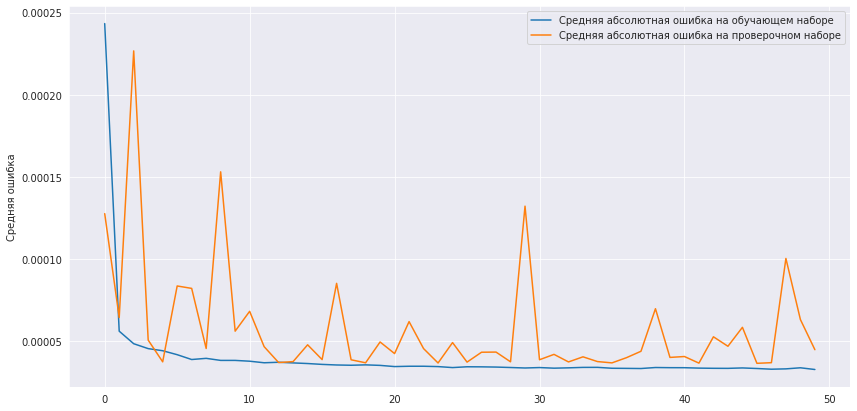

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelC
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler)

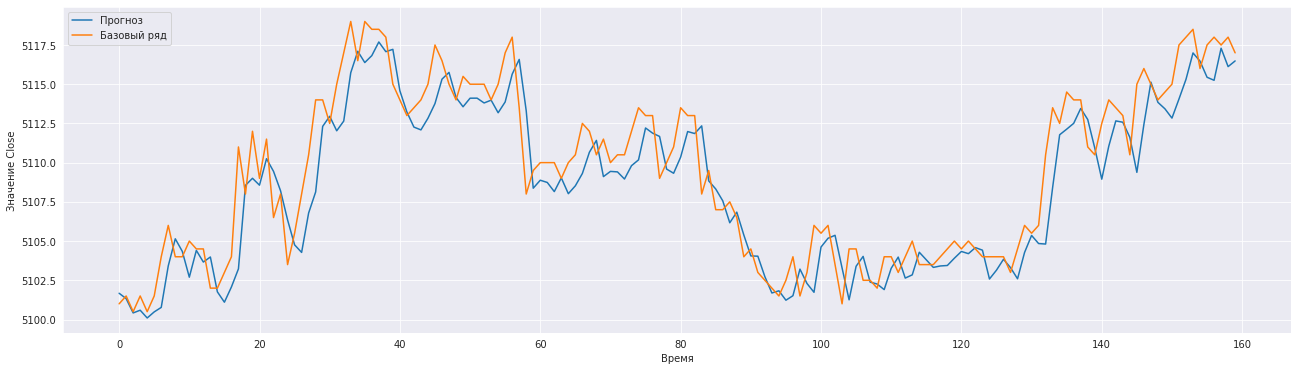

In [ ]:
#Отображаем графики
showPredict(100, 160, 0, predVal, yValUnscaled)

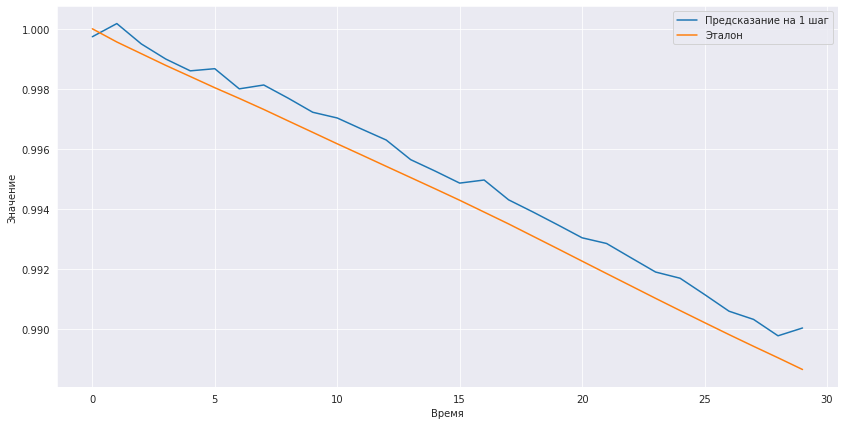

In [ ]:
#Отображаем корреляцию
showCorr([0], 30, predVal, yValUnscaled)

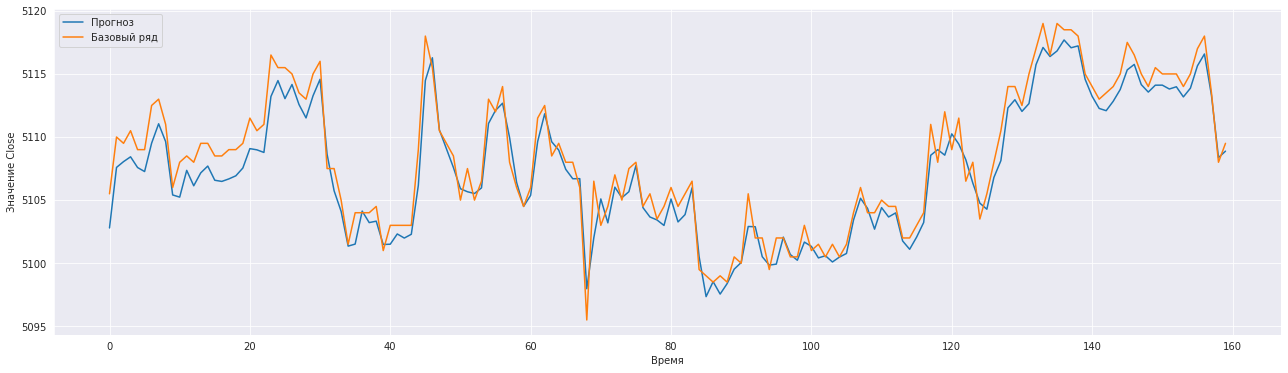

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelC #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[1:], yValUnscaled[:-1])


In [ ]:
modelC.compile(loss="mse", optimizer=Adam(lr=1e-5))
history = modelC.fit(trainDataGen,
                    epochs=20, 
                    verbose=1,
                    validation_data=testDataGen)

Epoch 1/20
22579/22579 [==============================] - 52s 2ms/step - loss: 5.1428e-07 - val_loss: 6.1935e-07
Epoch 2/20
22579/22579 [==============================] - 52s 2ms/step - loss: 4.9347e-07 - val_loss: 6.1994e-07
Epoch 3/20
22579/22579 [==============================] - 51s 2ms/step - loss: 4.8781e-07 - val_loss: 1.3378e-06
Epoch 4/20
22579/22579 [==============================] - 51s 2ms/step - loss: 4.9736e-07 - val_loss: 6.1121e-07
Epoch 5/20
22579/22579 [==============================] - 51s 2ms/step - loss: 4.8982e-07 - val_loss: 6.1171e-07
Epoch 6/20
22579/22579 [==============================] - 50s 2ms/step - loss: 4.6921e-07 - val_loss: 2.9309e-06
Epoch 7/20
22579/22579 [==============================] - 51s 2ms/step - loss: 4.8560e-07 - val_loss: 6.2405e-07
Epoch 8/20
22579/22579 [==============================] - 51s 2ms/step - loss: 4.8159e-07 - val_loss: 6.4483e-07
Epoch 9/20
22579/22579 [==============================] - 50s 2ms/step - loss: 4.7349e-07 - val_

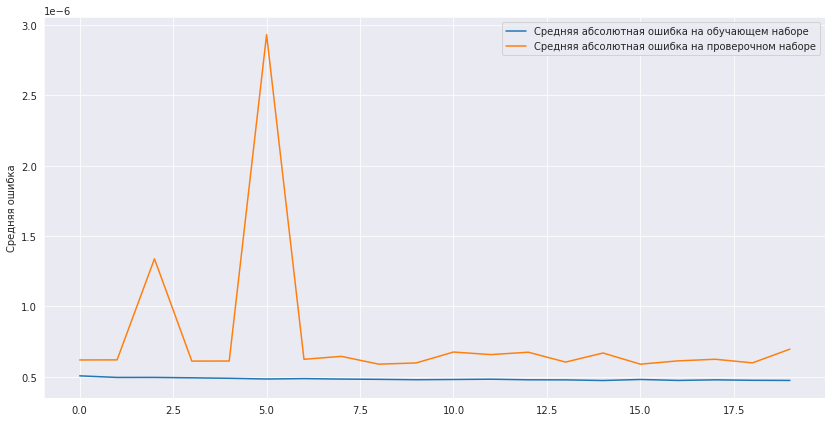

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

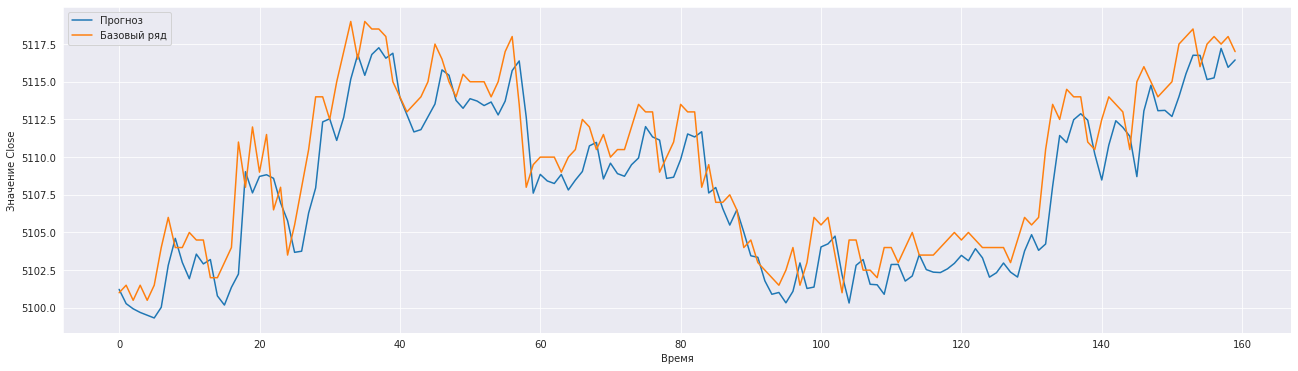

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelC
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler)
#Отображаем графики
showPredict(100, 160, 0, predVal, yValUnscaled)

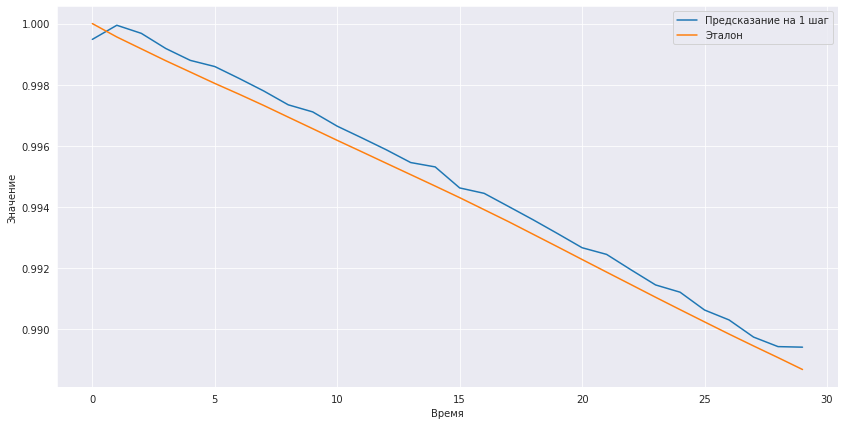

In [ ]:
#Отображаем корреляцию
showCorr([0], 30, predVal, yValUnscaled)

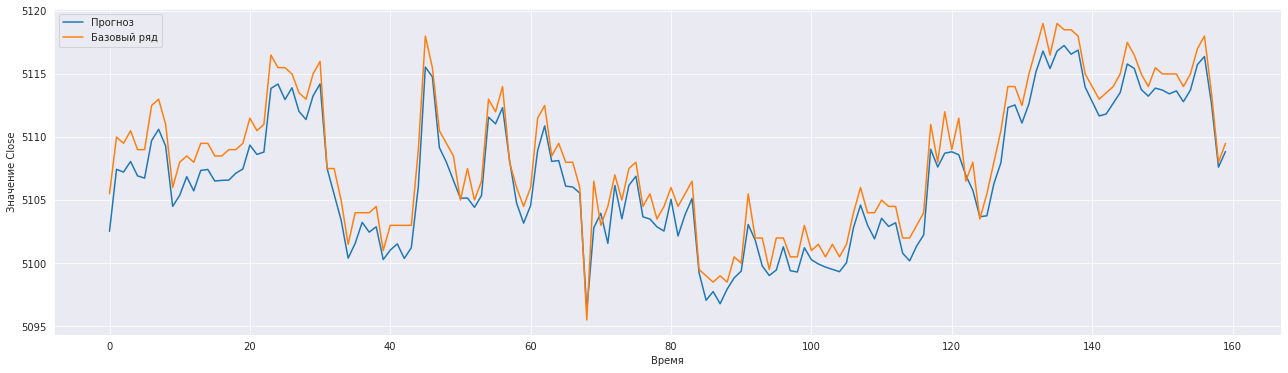

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelC #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[1:], yValUnscaled[:-1])


## LSTM


In [ ]:
import tensorflow
modelL = Sequential()
modelL.add(LSTM(5, input_shape = (xLen, 5)))
modelL.add(Dense(10, activation="relu"))
modelL.add(Dense(1, activation="linear"))

modelL.compile(loss="mse", optimizer=Adam(lr=1e-5))

modelL.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = modelL.fit(trainDataGen, 
                    epochs=20, 
                    verbose=1,
                    validation_data=testDataGen)

Epoch 1/20
22579/22579 [==============================] - 219s 10ms/step - loss: 0.0800 - val_loss: 8.7928e-05
Epoch 2/20
22579/22579 [==============================] - 218s 10ms/step - loss: 1.2723e-04 - val_loss: 1.7769e-05
Epoch 3/20
22579/22579 [==============================] - 218s 10ms/step - loss: 4.5347e-05 - val_loss: 1.3492e-05
Epoch 4/20
22579/22579 [==============================] - 218s 10ms/step - loss: 1.4739e-05 - val_loss: 8.5418e-06
Epoch 5/20
22579/22579 [==============================] - 217s 10ms/step - loss: 3.0772e-06 - val_loss: 1.6143e-06
Epoch 6/20
22579/22579 [==============================] - 216s 10ms/step - loss: 1.0854e-06 - val_loss: 1.5196e-06
Epoch 7/20
22579/22579 [==============================] - 216s 10ms/step - loss: 1.1343e-06 - val_loss: 1.5162e-06
Epoch 8/20
22579/22579 [==============================] - 216s 10ms/step - loss: 1.0601e-06 - val_loss: 1.6042e-06
Epoch 9/20
22579/22579 [==============================] - 215s 10ms/step - loss: 1.0

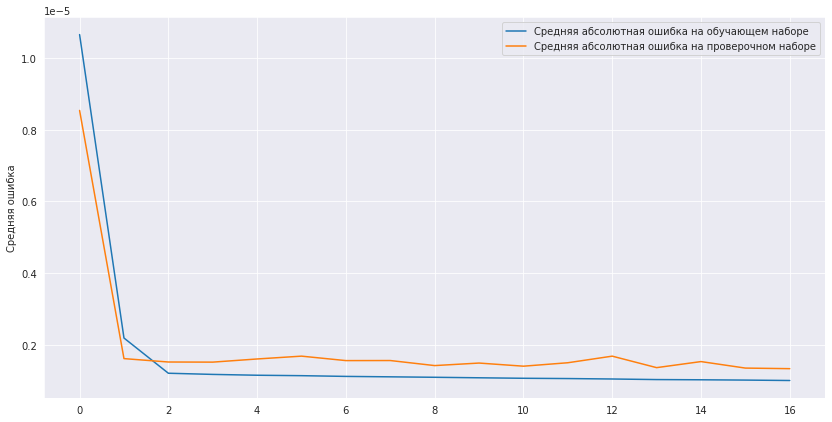

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'][3:], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'][3:], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
#Прогнозируем данные текущей сетью
(predVal, yValUnscaled) = getPred(modelL, xVal[0], yVal[0], yScaler)

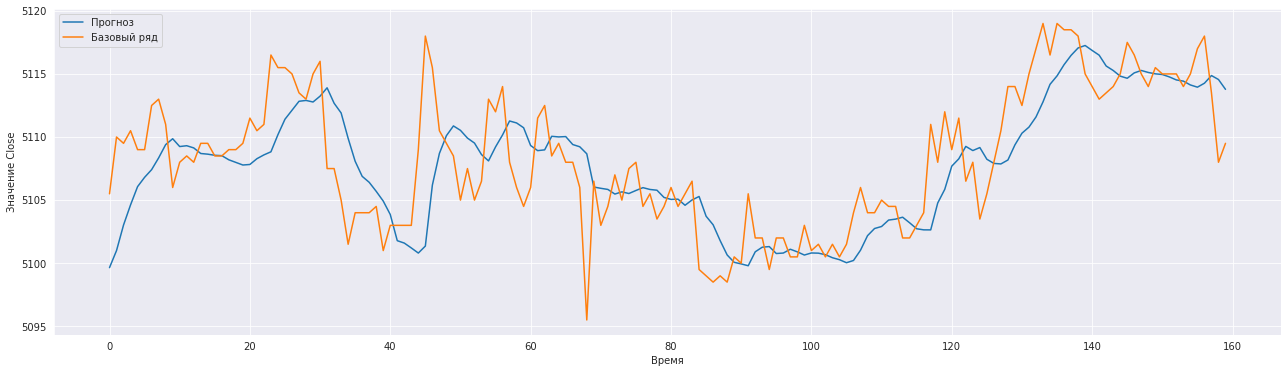

In [ ]:
#Отображаем графики
showPredict(0, 160, 0, predVal, yValUnscaled)

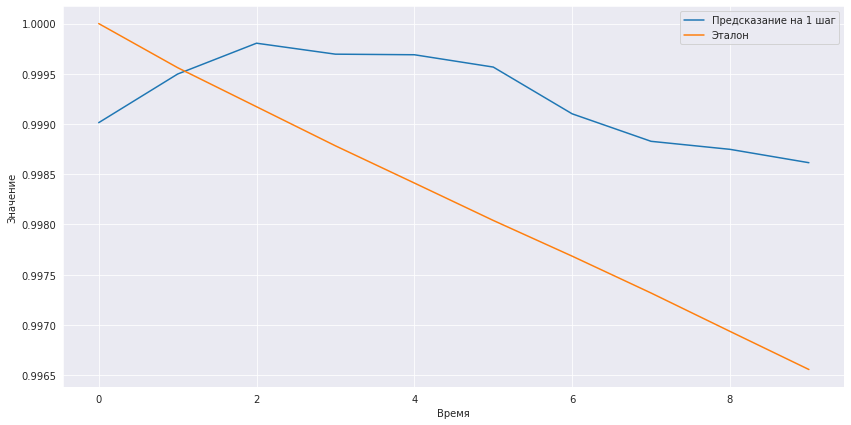

In [ ]:
#Отображаем корреляцию
showCorr([0], 10, predVal, yValUnscaled)

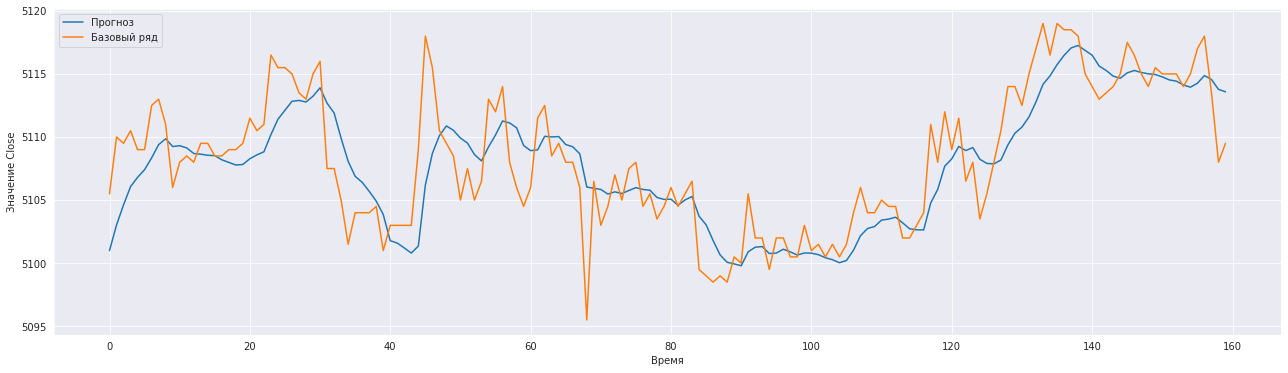

In [ ]:
#Прогнозируем данные текущей сетью
(predVal, yValUnscaled) = getPred(modelL, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[1:], yValUnscaled[:-1])

# Предсказание тренда (акции Сбербанка)

In [ ]:
import pandas as pd #Пандас
import matplotlib.pyplot as plt #Отрисовка графиков
from tensorflow.keras.utils import to_categorical 
import numpy as np #Numpy
from tensorflow.keras.optimizers import Adam #Оптимизатор
from tensorflow.keras.models import Sequential, Model #Два варианты моделей
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D, MaxPooling1D, RepeatVector #Стандартные слои
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Нормировщики
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # для генерации выборки временных рядов

import warnings
warnings.filterwarnings("ignore")
# Рисовать графики сразу же
%matplotlib inline

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler # проверить все
import numpy as np # Подключаем numpy
import seaborn as sns
sns.set_style('darkgrid')

from google.colab import drive
drive.mount('/content/drive')

step_in_the_last = 14   # По скольки шагам в прошлое определяем тренд     ##20,16,16,4
n_steps = 19            # Серию из скольки дней анализируем         ##44,42,48,6
forvard_lag = 1         # Предсказание какого бара в будущем делаем       ##1
analyze_period = 30000    # Сколько баров в прошлое берем для тренировки модели (чтобы ихбежать тренировки на другой динамике рынка) #3000,2000,1000

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Загрузка только [Open, High, Low, Close]

data = pd.read_csv('/content/drive/My Drive/Data/SBER_MIN60.txt', sep="\t", header=None)
data.columns=['Data', 'Open', 'High', 'Low', 'Close']

mask = (data['Data'] >= '2010-09-01 10:00:00.000') & (data['Data'] <= '2018-12-31 23:59:00.000')
data = data[mask]
data

,Data,Open,High,Low,Close
22047,2010-09-01 10:00:00.000,78.55,78.67,77.94,78.04
22048,2010-09-01 11:00:00.000,78.04,78.10,77.60,78.00
22049,2010-09-01 12:00:00.000,78.00,78.88,77.98,78.88
22050,2010-09-01 13:00:00.000,78.89,79.19,78.80,78.85
22051,2010-09-01 14:00:00.000,78.85,78.99,78.61,78.86
...,...,...,...,...,...
40860,2018-12-29 14:00:00.000,186.07,186.08,185.78,185.88
40861,2018-12-29 15:00:00.000,185.88,185.95,185.70,185.70
40862,2018-12-29 16:00:00.000,185.70,186.15,185.70,186.15
40863,2018-12-29 17:00:00.000,186.15,186.35,186.00,186.02


In [ ]:
df_data = data.drop(data.columns[[1, 2, 3]], axis='columns') # Оставляем дату и цену, чтобы потом добавить в outputs
del data['Data']


In [ ]:
df_data.head(5)

,Data,Close
22047,2010-09-01 10:00:00.000,78.04
22048,2010-09-01 11:00:00.000,78.00
22049,2010-09-01 12:00:00.000,78.88
22050,2010-09-01 13:00:00.000,78.85
22051,2010-09-01 14:00:00.000,78.86


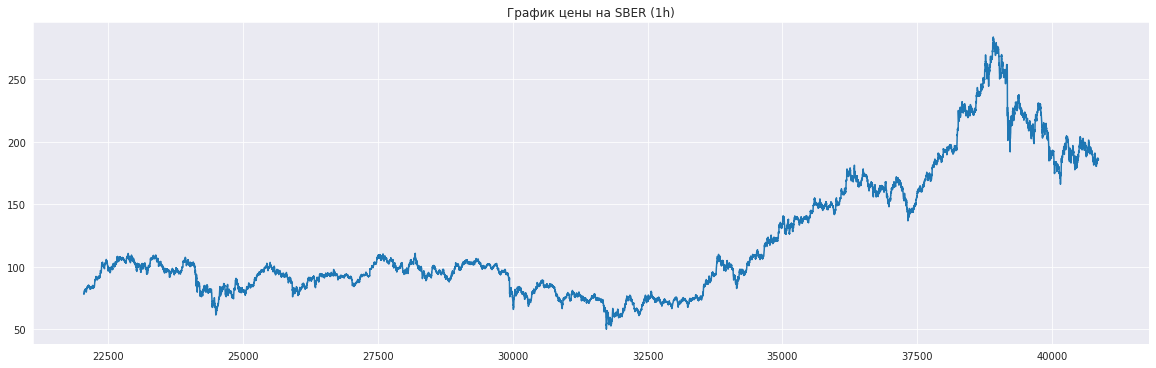

In [ ]:
plt.figure(figsize=(20,8))
ax0 = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
data['Close'].plot(ax = ax0)
plt.title('График цены на SBER (1h)')
plt.show()

In [ ]:
# считаем относительную доходность единицах на step_in_the_last шагов назад
for i in range(1, step_in_the_last + 1):
  indicator_name = 'Close_chng_%d' % (i)
  data[indicator_name] = data['Close'].pct_change(i) # относительная доходность единицах

print(data.shape)
data[:5]

(18818, 18)


,Open,High,Low,Close,Close_chng_1,Close_chng_2,Close_chng_3,Close_chng_4,Close_chng_5,Close_chng_6,Close_chng_7,Close_chng_8,Close_chng_9,Close_chng_10,Close_chng_11,Close_chng_12,Close_chng_13,Close_chng_14
22047,78.55,78.67,77.94,78.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22048,78.04,78.10,77.60,78.00,-0.000513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22049,78.00,78.88,77.98,78.88,0.011282,0.010764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22050,78.89,79.19,78.80,78.85,-0.000380,0.010897,0.010379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22051,78.85,78.99,78.61,78.86,0.000127,-0.000254,0.011026,0.010507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data.dropna() # удаляем строки с NaN
print(data.shape)
data[:5]

(18804, 18)


,Open,High,Low,Close,Close_chng_1,Close_chng_2,Close_chng_3,Close_chng_4,Close_chng_5,Close_chng_6,Close_chng_7,Close_chng_8,Close_chng_9,Close_chng_10,Close_chng_11,Close_chng_12,Close_chng_13,Close_chng_14
22061,80.87,81.00,80.12,80.40,-0.005566,-0.010340,-0.002853,0.002744,0.001121,-0.000249,0.019270,0.016563,0.018882,0.019528,0.019658,0.019270,0.030769,0.030241
22062,80.40,81.18,80.20,80.83,0.005348,-0.000247,-0.005047,0.002480,0.008107,0.006475,0.005098,0.024721,0.022000,0.024332,0.024981,0.025111,0.024721,0.036282
22063,80.83,80.96,80.51,80.85,0.000247,0.005597,0.000000,-0.004801,0.002729,0.008356,0.006724,0.005347,0.024975,0.022253,0.024585,0.025235,0.025365,0.024975
22064,80.85,81.17,80.14,80.63,-0.002721,-0.002474,0.002861,-0.002721,-0.007509,0.000000,0.005612,0.003985,0.002611,0.022186,0.019471,0.021797,0.022445,0.022575
22065,80.70,80.79,80.27,80.77,0.001736,-0.000989,-0.000742,0.004602,-0.000989,-0.005785,0.001736,0.007358,0.005728,0.004352,0.023960,0.021242,0.023571,0.024220


In [ ]:
# Добавил разметку направления тренда
for i in range(1, step_in_the_last + 1):
  indicator_name = 'Close_chng_%d' % (i)
  indicator_name_new = 'Y_%d' % (i)
  data[indicator_name_new] = 0
  data.loc[data[indicator_name] > 0 , indicator_name_new] = 1

for i in range(1, step_in_the_last + 1):
  indicator_name = 'Close_chng_%d' % (i)
  del data[indicator_name]

del data['Open'], data['High'], data['Low']

print(data.shape)
data[:5]

(18804, 15)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Close,Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7,Y_8,Y_9,Y_10,Y_11,Y_12,Y_13,Y_14
22061,80.40,0,0,0,1,1,0,1,1,1,1,1,1,1,1
22062,80.83,1,0,0,1,1,1,1,1,1,1,1,1,1,1
22063,80.85,1,1,0,0,1,1,1,1,1,1,1,1,1,1
22064,80.63,0,0,1,0,0,0,1,1,1,1,1,1,1,1
22065,80.77,1,0,0,1,0,0,1,1,1,1,1,1,1,1


**Формируем y_train**

In [ ]:
indicator_name = 'Y_%d' % (step_in_the_last)
data_Y = data[indicator_name]
data_Y[:5]

22061    1
22062    1
22063    1
22064    1
22065    1
Name: Y_14, dtype: int64

In [ ]:
categorical_labels = to_categorical(data_Y, num_classes = 2)
print(len(categorical_labels))
categorical_labels[:5]

18804


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

**Делим на обучающую и проверочную выборки**

In [ ]:
data = data.values
print(data.shape, type(data))

(18804, 15) <class 'numpy.ndarray'>


In [ ]:
# берем для xTest последние 600 значений
n_train = 600
xTrain = data[:-n_train-n_steps]
xTest = data[-n_train:]
yTrain = categorical_labels[:-n_train-n_steps]
yTest = categorical_labels[-n_train:]

print('xTrain: ', xTrain.shape, '\tyTrain:', yTrain.shape,
      '\nxTest:  ', xTest.shape, '\tyTest: ', yTest.shape)
xTrain.shape[0]+xTest.shape[0]

xTrain:  (18185, 15) 	yTrain: (18185, 2) 
xTest:   (600, 15) 	yTest:  (600, 2)


18785

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler # проверить все
""" 
# Масштабируем только X
"""
xScaler = StandardScaler()
xScaler.fit(xTrain)
xTrain = xScaler.transform(xTrain)
xTest = xScaler.transform(xTest)

print(xTrain.shape, xTest.shape, type(xTrain))
xTest[-1:]

(18185, 15) (600, 15) <class 'numpy.ndarray'>


array([[ 1.40650193,  1.00247764,  0.99271283,  0.99522723,  0.99053149,
         0.98401555,  0.9820689 ,  0.97678842, -1.02331264, -1.02353787,
        -1.02286232,  0.97904815,  0.97431919, -1.02952561, -1.02794036]])

**Ручной TimeSeries**

In [ ]:
"""
#### Функция разделения массива на выборки для обучения нейросети 
"""
# sequence = строка массива df
# n_steps = число баров в прошлом для анализа - необходимо найти оптимальный!!
# forvard_lag = предсказание какого бара в будущем делаем 

def split_sequence(sequence, Y, n_steps, forvard_lag):
  X, y = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps # находим конечный индекс строки
    if end_ix + (forvard_lag-1) > len(sequence)-1: # проверяем, чтобы не выйти за пределы массива
      break 
    seq_x, seq_y = sequence[i:end_ix], Y[end_ix + (forvard_lag - 1)]
    X.append(seq_x)
    y.append(seq_y) # тк предсказываем только Close
  return np.array(X), np.array(y)

In [ ]:
"""
# Число баров в прошлом для анализа - место для эксперимента от 0 до 90
"""
#for i in [forvard_lag, 0, 0]:
for i in [forvard_lag]:
  # Формируем выборки для обучения нейросети
  xTrain, yTrain = split_sequence(xTrain, yTrain, n_steps, forvard_lag=i)

  print('\nОбратите внимание на потерянные n_steps данных в начале выборки:')
  print('Массивы xTrain и yTrain:\t', xTrain.shape, yTrain.shape)


Обратите внимание на потерянные n_steps данных в начале выборки:
Массивы xTrain и yTrain:	 (18166, 19, 15) (18166, 2)


In [ ]:
"""
# Число баров в прошлом для анализа - место для эксперимента от 0 до 90
"""
#for i in [forvard_lag, 0, 0]:
for i in [forvard_lag]:
  # Формируем выборки для обучения нейросети
  xTest, yTest = split_sequence(xTest, yTest, n_steps, forvard_lag=i)

  print('\nОбратите внимание на потерянные n_steps данных в начале выборки:')
  print('Массивы xTest и yTest:\t', xTest.shape, yTest.shape)


Обратите внимание на потерянные n_steps данных в начале выборки:
Массивы xTest и yTest:	 (581, 19, 15) (581, 2)


## Создание нейронной сети

In [ ]:
# -----------------------------
# Conv1D = создаем модель
# -----------------------------

# xTrain.shape[1] - число шагов назад для обучения
# xTrain.shape[2] - число столбцов в обучающей выборке
  
drop = 0.4
input = Input(shape=(xTrain.shape[1], xTrain.shape[2]))
x = Flatten()(input)
x = RepeatVector(4)(x)
x = Conv1D(n_steps*2, 5, padding='same', activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
x = RepeatVector(4)(x)
x = Conv1D(n_steps, 5, padding='same', activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(n_steps*100, activation='relu')(x)
x = Dropout(drop)(x)
x = Dense(yTrain.shape[1], activation='sigmoid')(x)
model = Model(input, x)


Epoch 1/10
568/568 [==============================] - 6s 9ms/step - loss: 0.2794 - accuracy: 0.8939 - val_loss: 0.1616 - val_accuracy: 0.9484
Epoch 2/10
568/568 [==============================] - 4s 7ms/step - loss: 0.2083 - accuracy: 0.9230 - val_loss: 0.1559 - val_accuracy: 0.9552
Epoch 3/10
568/568 [==============================] - 4s 6ms/step - loss: 0.1994 - accuracy: 0.9275 - val_loss: 0.1544 - val_accuracy: 0.9535
Epoch 4/10
568/568 [==============================] - 4s 6ms/step - loss: 0.1949 - accuracy: 0.9282 - val_loss: 0.1510 - val_accuracy: 0.9518
Epoch 5/10
568/568 [==============================] - 4s 6ms/step - loss: 0.1897 - accuracy: 0.9304 - val_loss: 0.1525 - val_accuracy: 0.9466
Epoch 6/10
568/568 [==============================] - 4s 6ms/step - loss: 0.1865 - accuracy: 0.9315 - val_loss: 0.1507 - val_accuracy: 0.9587
Epoch 7/10
568/568 [==============================] - 3s 6ms/step - loss: 0.1818 - accuracy: 0.9325 - val_loss: 0.1519 - val_accuracy: 0.9518
Epoch 

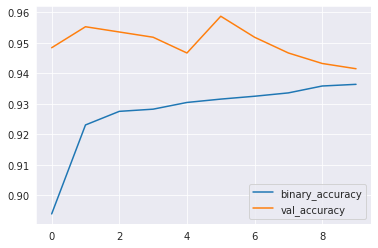

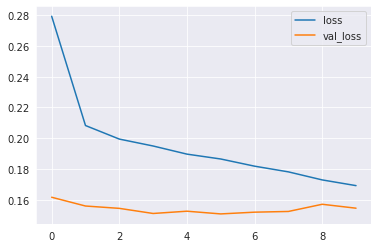

In [ ]:
#xTrain , yTrain = X, y # если не используется TimeSeries
model.compile(optimizer=Adam(learning_rate = 5e-05),
              loss='binary_crossentropy',
              metrics=['accuracy']) 

# fit model
history = model.fit(xTrain, yTrain, epochs=10, verbose = 1,
                    validation_data=(xTest, yTest))

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='binary_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
# От себя добавил цикл для распознавания всех тестовых вариантов и вывода класса
x_test = xTest[-200:]
y_test_org = yTest[-200:]
true_answer = 0
for i in range(len(x_test)):   # Выбираю пример
  x = x_test[i]
  x = np.expand_dims(x, axis=0)
  prediction = model.predict(x) # Распознаём наш пример
  #print('\n',prediction)
  prediction = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра)

  if prediction == np.argmax(y_test_org[i]):
    true_answer+=1
  
  print('Index:', i, '\tPrediction:', prediction, 'Real:', np.argmax(y_test_org[i]),
        '\t====>', y_test_org[i])

#clear_output()

print('Правильных ответов:', true_answer)
print('Ошибочных ответов:', 200- true_answer)

Index: 0 	Prediction: 1 Real: 1 	====> [0. 1.]
Index: 1 	Prediction: 1 Real: 1 	====> [0. 1.]
Index: 2 	Prediction: 1 Real: 1 	====> [0. 1.]
Index: 3 	Prediction: 1 Real: 1 	====> [0. 1.]
Index: 4 	Prediction: 1 Real: 1 	====> [0. 1.]
Index: 5 	Prediction: 1 Real: 1 	====> [0. 1.]
Index: 6 	Prediction: 1 Real: 1 	====> [0. 1.]
Index: 7 	Prediction: 1 Real: 1 	====> [0. 1.]
Index: 8 	Prediction: 0 Real: 0 	====> [1. 0.]
Index: 9 	Prediction: 1 Real: 1 	====> [0. 1.]
Index: 10 	Prediction: 0 Real: 1 	====> [0. 1.]
Index: 11 	Prediction: 0 Real: 1 	====> [0. 1.]
Index: 12 	Prediction: 1 Real: 1 	====> [0. 1.]
Index: 13 	Prediction: 1 Real: 1 	====> [0. 1.]
Index: 14 	Prediction: 1 Real: 1 	====> [0. 1.]
Index: 15 	Prediction: 1 Real: 1 	====> [0. 1.]
Index: 16 	Prediction: 1 Real: 1 	====> [0. 1.]
Index: 17 	Prediction: 1 Real: 1 	====> [0. 1.]
Index: 18 	Prediction: 1 Real: 1 	====> [0. 1.]
Index: 19 	Prediction: 1 Real: 1 	====> [0. 1.]
Index: 20 	Prediction: 1 Real: 1 	====> [0. 1.]
In

In [ ]:
186/200 * 100

93.0